#### dataset that contains medical information about children who have genetic disorders

In [1]:
import pandas as pd
import numpy as np

In [2]:
#combine the train and test datsets
#Load the train and test datasets
train = pd.read_csv("/workspaces/genetic_disorder/data/test.csv")
test = pd.read_csv("/workspaces/genetic_disorder/data/train.csv")

# Concatenate the DataFrames
df = pd.concat([train, test], axis=0, ignore_index=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,Multiple,-99.000000,slightly abnormal,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0,NaN,NaN
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,Singular,-99.000000,slightly abnormal,0.0,0.0,1.0,1.0,0.0,NaN,NaN
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0,NaN,NaN
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31543,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
31544,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
31545,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
31546,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [3]:
print(df["Genetic Disorder"].unique())
print(df["Disorder Subclass"].unique())

[nan 'Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
[nan "Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [4]:
col_count =len(list(df.columns))
col_count

45

In [5]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter)
count,30121.000000,31548.000000,25512.000000,25562.000000,29421.000000,29396.000000,29401.000000,29408.000000,29378.000000,29386.000000,29400.000000
mean,6.995418,4.899272,34.544646,41.920233,-7.133680,-7.008403,-7.067821,-6.079706,-7.046395,-5.197611,-0.125003
std,4.325345,0.199510,9.845861,13.037442,25.600141,25.391654,25.490827,25.648991,25.455127,26.032054,27.556479
min,0.000000,4.092727,18.000000,20.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,3.000000,4.763948,26.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.861915
50%,7.000000,4.899315,35.000000,42.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,7.183280
75%,11.000000,5.033619,43.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,9.355955
max,14.000000,5.676184,51.000000,64.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,12.000000


In [6]:
#removing the irrelevant features
df.drop(columns=['Patient Id', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute'], inplace=True)
col_count =len(list(df.columns))
col_count 


39

In [7]:
# checking the null values

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Patient Age                                          4.523266
Genes in mother's side                               0.000000
Inherited from father                                2.716495
Maternal gene                                       20.708127
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Mother's age                                        19.132750
Father's age                                        18.974261
Status                                               0.000000
Respiratory Rate (breaths/min)                      15.959807
Heart Rate (rates/min                               15.890072
Test 1                                               6.742107
Test 2                                               6.821352
Test 3                                               6.805503
Test 4                                               6.783314
Test 5                                               6.878408
Parental

In [8]:
# Getting the top 5 columns with the highest percentage of missing values
top_10_missing = missing_percentage.nlargest(10)

# the result
print(top_10_missing)

Disorder Subclass                             36.873970
Genetic Disorder                              36.804235
Maternal gene                                 20.708127
Mother's age                                  19.132750
Father's age                                  18.974261
Autopsy shows birth defect (if applicable)    17.725371
Respiratory Rate (breaths/min)                15.959807
Heart Rate (rates/min                         15.890072
Symptom 2                                      7.043236
H/O substance abuse                            6.957652
dtype: float64


Based on the above missing value percentages.

As per the above observations:

- Many columns have missing values ranging from approximately **0% to almost 28%**.
- Some columns with higher percentages of missing values are:
  - Disorder Subclass                             36.87%
  - Genetic Disorder                              36.80%
  - Maternal gene                                 20.71%
  - Mother's age                                  19.13%
  - Father's age                                  18.97%
  - Autopsy shows birth defect (if applicable)    17.73%
  - Respiratory Rate (breaths/min)                15.96%
  - Heart Rate (rates/min                         15.89%
  - Symptom 2                                      7.04%
  - H/O substance abuse                            6.96%


I am considering to drop the target variables rows Disorder Subclass(36.87%),Genetic Disorder(36.80%)

These are having high percentage of missing values and need to dropped.

Trying to impute missing values using appropriate methods (mean, median, mode) depending on the type of data (numerical or categorical).

For handling the type of data following approches will be used.

- Numerical Columns: will use mean or median.
- Categorical Columns: will use mode.

checking the nuul values after dropping the vaues of target columns

In [9]:
#dropping the rows from the target variables rows having null values
df = df.dropna(subset=['Disorder Subclass', 'Genetic Disorder'])

# Reset the index
df = df.reset_index(drop=True)

In [10]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,9.0,No,Yes,Yes,Yes,5.012599,47.0,NaN,Deceased,NaN,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
18043,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
18044,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
18045,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [11]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Patient Age                                          5.873552
Genes in mother's side                               0.000000
Inherited from father                                1.219039
Maternal gene                                       11.475592
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Mother's age                                        24.696625
Father's age                                        24.480523
Status                                               0.000000
Respiratory Rate (breaths/min)                       8.699507
Heart Rate (rates/min                                8.466781
Test 1                                               8.716130
Test 2                                               8.799246
Test 3                                               8.693966
Test 4                                               8.721671
Test 5                                               8.843575
Parental

In [12]:
top_10_missing = missing_percentage.nlargest(10)

# the result
print(top_10_missing)

Mother's age                                        24.696625
Father's age                                        24.480523
Autopsy shows birth defect (if applicable)          19.737352
Maternal gene                                       11.475592
Symptom 2                                            9.120629
H/O substance abuse                                  9.043054
History of anomalies in previous pregnancies         8.943315
Symptom 5                                            8.937774
White Blood cell count (thousand per microliter)     8.904527
Test 5                                               8.843575
dtype: float64


In [13]:
# Print the missing value percentages for columns that have missing values
print("Percentage of missing values for each column with missing data:")
missing_columns = missing_percentage[missing_percentage > 0]
print(len(missing_columns))
print(missing_columns)

Percentage of missing values for each column with missing data:
33
Patient Age                                          5.873552
Inherited from father                                1.219039
Maternal gene                                       11.475592
Mother's age                                        24.696625
Father's age                                        24.480523
Respiratory Rate (breaths/min)                       8.699507
Heart Rate (rates/min                                8.466781
Test 1                                               8.716130
Test 2                                               8.799246
Test 3                                               8.693966
Test 4                                               8.721671
Test 5                                               8.843575
Parental consent                                     8.749377
Follow-up                                            8.727212
Gender                                               8.716130
Bir

Handling missing values for the columns
- Each column has a seperate procedure for handling the missing values

In [14]:
#copying the original daaset
df1 = df.copy()

In [15]:
#handling parents age
df1["Patient Age"].unique()

array([ 2.,  6., 12., 11., 14.,  3.,  4.,  7.,  1.,  0., nan, 10.,  5.,
        8.,  9., 13.])

In [16]:
df1['Patient Age'] = df1['Patient Age'].fillna(df1['Patient Age'].median())

In [17]:
df1["Patient Age"].unique()

array([ 2.,  6., 12., 11., 14.,  3.,  4.,  7.,  1.,  0., 10.,  5.,  8.,
        9., 13.])

#### Materinal Gene ,create unknown category for that as it has high missing values

In [18]:
df1["Maternal gene"].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
# Fill null values with the "No record" 
df1['Maternal gene'] = df1['Maternal gene'].fillna('No record')

In [20]:
df1["Maternal gene"].unique()

array(['Yes', 'No', 'No record'], dtype=object)

### Parent ages handling

In [21]:
# using knn imputer for handling null values of parents ages as these are numerical
from sklearn.impute import KNNImputer
import numpy as np

age_columns = ["Mother's age", "Father's age"]

# KNNImputer
imputer = KNNImputer(n_neighbors=5) 

# Reshaping the data for imputation
age_data = df1[age_columns].values.reshape(-1, 2)

# imputation
imputed_ages = imputer.fit_transform(age_data)

# Round the imputed values to the nearest integer
imputed_ages_rounded = np.round(imputed_ages).astype(int)

# Updating  with rounded imputed values
df1[age_columns] = imputed_ages_rounded

print(df1[age_columns].isnull().sum())


Mother's age    0
Father's age    0
dtype: int64


In [22]:
df1

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,35,42,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41,22,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21,40,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,No record,Yes,4.720703,32,39,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,35,42,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,9.0,No,Yes,Yes,Yes,5.012599,47,52,Deceased,NaN,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
18043,4.0,Yes,Yes,Yes,No,5.258298,35,64,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
18044,8.0,No,Yes,No,Yes,4.974220,28,56,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
18045,8.0,Yes,No,Yes,No,5.186470,35,51,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [23]:
# unique_value = df1["Test 1"].dropna().unique()[0]
# unique_value
df1["Test 1"].unique()

array([ 0., nan])

For tests(1-5) it has unique values either 1 or 0, imputation methods works only it has two or multiple values,the null values in those columns might be the same value, so filling the null values in tests columns with their unique values and impute "mode" to Respiratory Rate (breaths/min)', 'Heart Rate (rates/min)'


In [24]:
test_cols = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent']

for col in test_cols:
    # Getting the unique non-null values
    unique_values = df1[col].dropna().unique()
    
    # Check if there is exactly one unique non-null value
    if len(unique_values) == 1:
        # Fill NaN values with this unique value
        unique_value = unique_values[0]
        df1[col].fillna(unique_value, inplace=True)
    else:
        print(f"Column '{col}' has more than one unique non-null value.Skipping the {'col'}.")


/tmp/ipykernel_23453/3050681407.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(unique_value, inplace=True)


In [25]:
df1["Test 4"].isnull().sum()

np.int64(0)

In [26]:
df1["Test 4"].unique()

array([1.])

In [27]:
print(df1['Respiratory Rate (breaths/min)'].unique())
print(df1['Heart Rate (rates/min'].unique())

['Normal (30-60)' 'Tachypnea' nan]
['Normal' 'Tachycardia' nan]


In [28]:
mode_value = df1['Heart Rate (rates/min'].mode()[0]
mode_value

'Normal'

In [29]:
# Fill null values with the mode
#inoreder to avoid the warningerror use :loc 
mode_columns = ["Inherited from father","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Follow-up",
                "Gender","Birth asphyxia","Autopsy shows birth defect (if applicable)",
                "Folic acid details (peri-conceptional)","H/O serious maternal illness",
                "Assisted conception IVF/ART","History of anomalies in previous pregnancies",
                "Birth defects","Blood test result","Symptom 1","Symptom 2","Symptom 3","Symptom 4",
                "Symptom 5","Place of birth"]

for col in mode_columns:
    mode_value = df1[col].mode()[0]
    df1.loc[:, col] = df1[col].fillna(mode_value)
    print(df1[col].unique())

['No' 'Yes']
['Normal (30-60)' 'Tachypnea']
['Normal' 'Tachycardia']
['High' 'Low']
['Male' 'Female' 'Ambiguous']
['Yes' 'No record' 'Not available' 'No']
['Not applicable' 'No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Multiple' 'Singular']
['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
['Institute' 'Home']


/tmp/ipykernel_23453/2646844456.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.loc[:, col] = df1[col].fillna(mode_value)


Checking for the Unique values on different columns

In [30]:
col = list(df1.columns)

for i in col:
    uniq = df1[i].unique()
    if len(uniq) <= 10: # just checking,some columns has so many values
        print(f'{i}: {uniq}')

Genes in mother's side: ['Yes' 'No']
Inherited from father: ['No' 'Yes']
Maternal gene: ['Yes' 'No' 'No record']
Paternal gene: ['No' 'Yes']
Status: ['Alive' 'Deceased']
Respiratory Rate (breaths/min): ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min: ['Normal' 'Tachycardia']
Test 1: [0.]
Test 2: [0.]
Test 3: [0.]
Test 4: [1.]
Test 5: [0.]
Parental consent: ['Yes']
Follow-up: ['High' 'Low']
Gender: ['Male' 'Female' 'Ambiguous']
Birth asphyxia: ['Yes' 'No record' 'Not available' 'No']
Autopsy shows birth defect (if applicable): ['Not applicable' 'No' 'Yes']
Place of birth: ['Institute' 'Home']
Folic acid details (peri-conceptional): ['No' 'Yes']
H/O serious maternal illness: ['No' 'Yes']
H/O radiation exposure (x-ray): ['No' 'Yes' '-' 'Not applicable' nan]
H/O substance abuse: ['No' nan 'Not applicable' '-' 'Yes']
Assisted conception IVF/ART: ['No' 'Yes']
History of anomalies in previous pregnancies: ['Yes' 'No']
No. of previous abortion: [nan  4.  1.  0.  3.  2.]
Birth defects: ['M

replacing "-" with NaN and eventually impute the NaN with Mode

In [31]:
columns = ["H/O radiation exposure (x-ray)","H/O substance abuse"]
for col in columns:
    df1[col] = df1[col].replace('-', np.nan)
    mode_value = df1[col].mode()[0]
    df1.loc[:, col] = df1[col].fillna(mode_value)
    print(df1[col].unique())

['No' 'Yes' 'Not applicable']
['No' 'Not applicable' 'Yes']


Final check of null values

In [32]:
missing_percentage = df1.isnull().mean() * 100
print(missing_percentage)

Patient Age                                         0.000000
Genes in mother's side                              0.000000
Inherited from father                               0.000000
Maternal gene                                       0.000000
Paternal gene                                       0.000000
Blood cell count (mcL)                              0.000000
Mother's age                                        0.000000
Father's age                                        0.000000
Status                                              0.000000
Respiratory Rate (breaths/min)                      0.000000
Heart Rate (rates/min                               0.000000
Test 1                                              0.000000
Test 2                                              0.000000
Test 3                                              0.000000
Test 4                                              0.000000
Test 5                                              0.000000
Parental consent        

use KNN imputer to "No. of previous abortion" & "White Blood cell count (thousand per microliter)"

In [33]:
df1["White Blood cell count (thousand per microliter)"].mode()

0    3.0
Name: White Blood cell count (thousand per microliter), dtype: float64

In [34]:
#knn imputer

columns_test = ["No. of previous abortion", "White Blood cell count (thousand per microliter)"]

# KNNImputer
imputer = KNNImputer(n_neighbors=5) 

# Reshaping the data for imputation
columns_test_data = df1[columns_test].values

# imputation
imputed_col = imputer.fit_transform(columns_test_data)

# Update the original DataFrame with imputed values
df1[columns_test] = imputed_col

# Round the imputed values to the nearest integer only for "No. of previous abortion"
df1["No. of previous abortion"] = np.round(df1["No. of previous abortion"]).astype(int)

print(df1[columns_test].isnull().sum())

No. of previous abortion                            0
White Blood cell count (thousand per microliter)    0
dtype: int64


In [35]:
missing_percentage = df1.isnull().mean() * 100
print(missing_percentage)

Patient Age                                         0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Blood cell count (mcL)                              0.0
Mother's age                                        0.0
Father's age                                        0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                               0.0
Test 1                                              0.0
Test 2                                              0.0
Test 3                                              0.0
Test 4                                              0.0
Test 5                                              0.0
Parental consent                                    0.0
Follow-up                                       

In [36]:
df1["White Blood cell count (thousand per microliter)"] 

0         9.857562
1         6.208580
2         7.919321
3         4.098210
4        10.272230
           ...    
18042    12.000000
18043     6.584811
18044     7.041556
18045     7.715464
18046    11.188371
Name: White Blood cell count (thousand per microliter), Length: 18047, dtype: float64

In [37]:
# Rounding the values to 2 decimal places
df1["White Blood cell count (thousand per microliter)"] = df1["White Blood cell count (thousand per microliter)"].round(2)
df1["White Blood cell count (thousand per microliter)"] 


0         9.86
1         6.21
2         7.92
3         4.10
4        10.27
         ...  
18042    12.00
18043     6.58
18044     7.04
18045     7.72
18046    11.19
Name: White Blood cell count (thousand per microliter), Length: 18047, dtype: float64

In [38]:
# # Saving the df1 to a CSV file
# df1.to_csv('updated_imputed_data.csv', index=False)

# print("DataFrame has been saved to 'updated_imputed_data.csv'.")

### Feature Selection

In [39]:
df1.dtypes

Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Mother's age                                          int64
Father's age                                          int64
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                                object
Test 1                                              float64
Test 2                                              float64
Test 3                                              float64
Test 4                                              float64
Test 5                                              float64
Parental consent                        

In [40]:
# checking for the unique values in the columns,identifying with 1 unique value
columns =list(df1.columns)

for i in columns:
    print(f'{i}: {len(df1[i].unique())==1}')

Patient Age: False
Genes in mother's side: False
Inherited from father: False
Maternal gene: False
Paternal gene: False
Blood cell count (mcL): False
Mother's age: False
Father's age: False
Status: False
Respiratory Rate (breaths/min): False
Heart Rate (rates/min: False
Test 1: True
Test 2: True
Test 3: True
Test 4: True
Test 5: True
Parental consent: True
Follow-up: False
Gender: False
Birth asphyxia: False
Autopsy shows birth defect (if applicable): False
Place of birth: False
Folic acid details (peri-conceptional): False
H/O serious maternal illness: False
H/O radiation exposure (x-ray): False
H/O substance abuse: False
Assisted conception IVF/ART: False
History of anomalies in previous pregnancies: False
No. of previous abortion: False
Birth defects: False
White Blood cell count (thousand per microliter): False
Blood test result: False
Symptom 1: False
Symptom 2: False
Symptom 3: False
Symptom 4: False
Symptom 5: False
Genetic Disorder: False
Disorder Subclass: False


Dropping the Columns from Test1 to Test 5 and "Parental consent" as it has unique values,and it has single unique value across all samples do not contribute to the model's ability to make predictions, as they do not provide any new or useful information

In [41]:
#test columns
test_columns = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5','Parental consent']

df1 = df1.drop(columns=test_columns)
df1.head(5)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,35,42,Alive,Normal (30-60),...,Multiple,9.86,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,Yes,No,No,No,4.893297,41,22,Alive,Normal (30-60),...,Singular,6.21,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Yes,No,Yes,No,4.705280,21,40,Deceased,Tachypnea,...,Singular,7.92,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Yes,No,No record,Yes,4.720703,32,39,Alive,Tachypnea,...,Multiple,4.10,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Yes,No,Yes,No,5.103188,35,42,Deceased,Normal (30-60),...,Multiple,10.27,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [42]:
df1.select_dtypes(include = 'number')

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,2.0,4.760603,35,42,2,9.86
1,6.0,4.893297,41,22,4,6.21
2,12.0,4.705280,21,40,1,7.92
3,11.0,4.720703,32,39,4,4.10
4,14.0,5.103188,35,42,0,10.27
...,...,...,...,...,...,...
18042,9.0,5.012599,47,52,2,12.00
18043,4.0,5.258298,35,64,3,6.58
18044,8.0,4.974220,28,56,2,7.04
18045,8.0,5.186470,35,51,2,7.72


checking the outliers using box plot

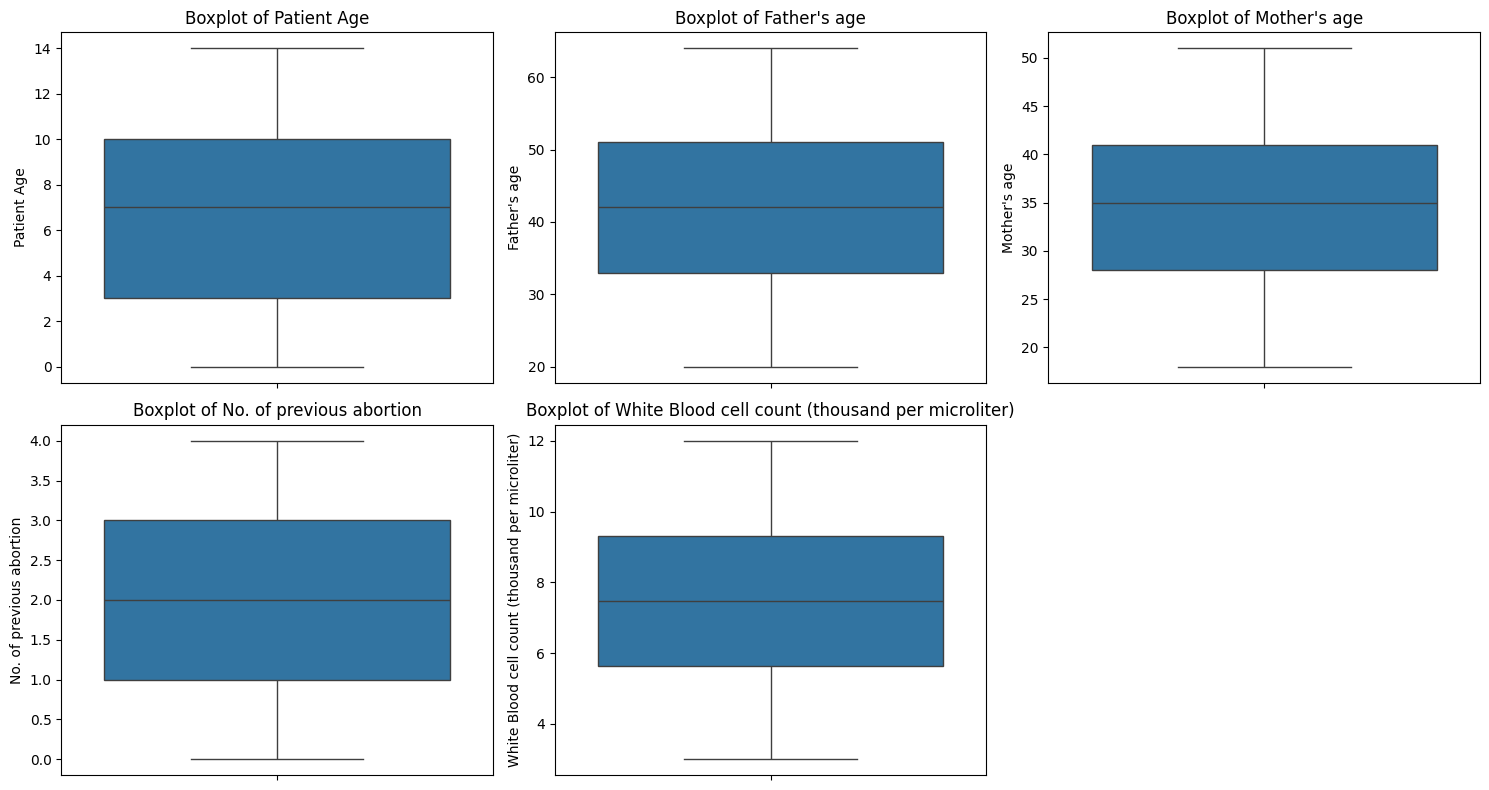

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your numerical features
numerical_features = [
    'Patient Age',
    "Father's age",
    "Mother's age",
    'No. of previous abortion',
    'White Blood cell count (thousand per microliter)'
]

# Create boxplots for each feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid as necessary
    sns.boxplot(y=df1[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()  # Adjust subplots to fit into the figure area

plt.show()


In [44]:
df1[numerical_features].describe()

,Patient Age,Father's age,Mother's age,No. of previous abortion,White Blood cell count (thousand per microliter)
count,18047.000000,18047.000000,18047.000000,18047.000000,18047.000000
mean,6.951793,42.052142,34.673464,1.991688,7.502233
std,4.185784,11.623637,8.705180,1.361199,2.552535
min,0.000000,20.000000,18.000000,0.000000,3.000000
25%,3.000000,33.000000,28.000000,1.000000,5.630000
50%,7.000000,42.000000,35.000000,2.000000,7.480000
75%,10.000000,51.000000,41.000000,3.000000,9.300000
max,14.000000,64.000000,51.000000,4.000000,12.000000


seemes there are no outliers

In [45]:
ordinal_features = [
    'Follow-up',
    'Respiratory Rate (breaths/min)',
    'Heart Rate (rates/min'
]

for i in ordinal_features:
    print(f'{i}: {df1[i].unique()}')



Follow-up: ['High' 'Low']
Respiratory Rate (breaths/min): ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min: ['Normal' 'Tachycardia']


In [46]:
# Correct categorization based on the unique values provided
numerical_features = [
    'Patient Age',
    "Father's age",
    "Mother's age",
    'No. of previous abortion',
    'White Blood cell count (thousand per microliter)'
]

binary_features = [
    'Genes in mother\'s side',
    'Inherited from father',
    'Paternal gene',
    'Status',
    'Place of birth',
    'Folic acid details (peri-conceptional)',
    'H/O serious maternal illness',
    'Assisted conception IVF/ART',
    'History of anomalies in previous pregnancies',
    'Symptom 1',
    'Symptom 2',
    'Symptom 3',
    'Symptom 4',
    'Symptom 5'
]

ordinal_features = [
    'Follow-up',
    'Respiratory Rate (breaths/min)',
    'Heart Rate (rates/min'
]

onehot_features = [
    'Maternal gene',
    'Gender',
    'Birth asphyxia',
    'Autopsy shows birth defect (if applicable)',
    'H/O radiation exposure (x-ray)',
    'H/O substance abuse',
    'Birth defects',
    'Blood test result'
]


In [47]:
# target variables
target_variables = ['Genetic Disorder', 'Disorder Subclass']

# Prepare the data
X = df1.drop(target_variables, axis=1)
y1 = df1['Genetic Disorder']
y2 = df1['Disorder Subclass']

In [48]:
# Function to encode binary string features as it has "string" objects
def encode_binary(X, binary_features):
    for feature in binary_features:
        if X[feature].dtype == 'object':
            # get the unique values
            unique_values = X[feature].unique()
            if len(unique_values) == 2:
                # Create a mapping dictionary
                mapping = {unique_values[0]: 0, unique_values[1]: 1}
                # Apply mapping
                X[feature] = X[feature].map(mapping)
    return X

# apply binary encoding
X = encode_binary(X, binary_features)

In [49]:
X.head(5)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,0,0,Yes,0,4.760603,35,42,0,Normal (30-60),...,0,2,Multiple,9.86,slightly abnormal,0,0,0,0,0
1,6.0,0,0,No,0,4.893297,41,22,0,Normal (30-60),...,0,4,Singular,6.21,normal,1,0,0,0,0
2,12.0,0,0,Yes,0,4.705280,21,40,1,Tachypnea,...,0,1,Singular,7.92,inconclusive,1,1,0,1,1
3,11.0,0,0,No record,1,4.720703,32,39,0,Tachypnea,...,1,4,Multiple,4.10,slightly abnormal,1,1,1,1,1
4,14.0,0,0,Yes,0,5.103188,35,42,1,Normal (30-60),...,1,0,Multiple,10.27,normal,0,1,1,0,1


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
# Create preprocessing steps (without standardization for chi-square)
preprocessor_ = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_features),
        ('ord', OrdinalEncoder(), ordinal_features)
    ])

In [51]:
# Fit and transform the data
X_encoded= preprocessor_.fit_transform(X)
X_encoded

array([[ 2., 42., 35., ...,  0.,  0.,  0.],
       [ 6., 22., 41., ...,  1.,  0.,  1.],
       [12., 40., 21., ...,  0.,  1.,  0.],
       ...,
       [ 8., 56., 28., ...,  0.,  0.,  0.],
       [ 8., 51., 35., ...,  0.,  1.,  0.],
       [11., 62., 32., ...,  0.,  0.,  0.]])

In [52]:
# Get feature names after encoding
onehot_encoder = preprocessor_.named_transformers_['cat']
cat_feature_names = onehot_encoder.get_feature_names_out(onehot_features)
feature_names = np.concatenate([numerical_features, binary_features, cat_feature_names, ordinal_features])

In [53]:
# # Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index) #X.index to match the column names with "X"
encoded_df

,Patient Age,Father's age,Mother's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Paternal gene,Status,Place of birth,...,H/O substance abuse_Yes,Birth defects_Multiple,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Follow-up,Respiratory Rate (breaths/min),Heart Rate (rates/min
0,2.0,42.0,35.0,2.0,9.86,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6.0,22.0,41.0,4.0,6.21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12.0,40.0,21.0,1.0,7.92,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,11.0,39.0,32.0,4.0,4.10,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,14.0,42.0,35.0,0.0,10.27,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,9.0,52.0,47.0,2.0,12.00,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18043,4.0,64.0,35.0,3.0,6.58,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18044,8.0,56.0,28.0,2.0,7.04,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18045,8.0,51.0,35.0,2.0,7.72,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Feature selection implemetation

As our data has mixed datatypes and need to be properly encoded,using one hot,ordinal encoding etc..based on the unique values in the column

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from scipy.stats import uniform, randint
import lightgbm as lgb


Creating Feature selection function as it has three test as follows

In [55]:
# Preprocessing
X = encoded_df
y1 = df1['Genetic Disorder']
y2 = df1['Disorder Subclass']

# Split the data for Genetic Disorder
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify= y1)


In [56]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature selection techniques

In [57]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [58]:
# Feature Selection Techniques

# 1. Recursive Feature Elimination (RFE)
model_rfe = RandomForestClassifier()
rfe = RFE(model_rfe, n_features_to_select=20)  # Select top 20 features
rfe.fit(X_train_scaled, y_train)

# To retain feature names, use the original DataFrame columns
rfe_features = X_train.columns[rfe.support_]  # Referring to the original feature names
print("RFE selected features:", rfe_features)

RFE selected features: Index(['Patient Age', 'Father's age', 'Mother's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Status',
       'Place of birth', 'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Gender_Male',
       'Birth asphyxia_Yes', 'H/O radiation exposure (x-ray)_Not applicable',
       'H/O substance abuse_No', 'Birth defects_Multiple',
       'Blood test result_slightly abnormal', 'Follow-up',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min'],
      dtype='object')


In [59]:
# Recursive Feature Elimination using scaling using random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5) 
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

rfc_GD_features =[]
print("Most Important Features:")
for feature in most_important_features:
    rfc_GD_features.append(feature)
    print(feature)

print(rfc_GD_features)





Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Genes in mother's side
Inherited from father
Paternal gene
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Maternal gene_No
Maternal gene_Yes
H/O substance abuse_Not applicable
H/O substance abuse_Yes
Blood test result_slightly abnormal
Follow-up
Respiratory Rate (breaths/min)
['Patient Age', "Father's age", "Mother's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', "Genes in mother's side", 'Inherited from father', 'Paternal gene', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Maternal gene_No', 'Maternal gene_Yes', 'H/O substance abuse_Not applicable', 'H/O substance abuse_Yes', 'Blood test result_slightly abnormal', 'Follow-up', 'Respiratory Rate (breaths/min)']


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Recursive Feature Elimination using scaling using GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10)
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

gb_GD_features = []
print("Most Important Features:")
for feature in most_important_features:
    gb_GD_features.append(feature)
    print(feature)

print(gb_GD_features)

Most Important Features:
Patient Age
Father's age
Mother's age
White Blood cell count (thousand per microliter)
Genes in mother's side
Inherited from father
Paternal gene
Assisted conception IVF/ART
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Maternal gene_Yes
Autopsy shows birth defect (if applicable)_Not applicable
H/O substance abuse_No
Birth defects_Multiple
Blood test result_slightly abnormal
Follow-up
Respiratory Rate (breaths/min)
['Patient Age', "Father's age", "Mother's age", 'White Blood cell count (thousand per microliter)', "Genes in mother's side", 'Inherited from father', 'Paternal gene', 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Maternal gene_Yes', 'Autopsy shows birth defect (if applicable)_Not applicable', 'H/O substance abuse_No', 'Birth defects_Multiple', 'Blood test result_slightly abnormal', 'Follow-up', 'Respiratory Rate (breaths/min)']


In [61]:
# Logistic Regression Model with L2 Penalty
model = LogisticRegression(max_iter=1000,penalty='l2', solver='liblinear')  # You can choose other solvers as needed

# Recursive Feature Elimination
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

lr_GD_features = []
print("Most Important Features:")
for feature in most_important_features:
    lr_GD_features.append(feature)
    print(feature)

print(lr_GD_features)

Most Important Features:
Genes in mother's side
Inherited from father
Paternal gene
History of anomalies in previous pregnancies
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Maternal gene_No
Maternal gene_Yes
Gender_Ambiguous
Gender_Male
Birth asphyxia_No
Autopsy shows birth defect (if applicable)_No
Birth defects_Multiple
Blood test result_normal
Blood test result_slightly abnormal
Follow-up
Respiratory Rate (breaths/min)
["Genes in mother's side", 'Inherited from father', 'Paternal gene', 'History of anomalies in previous pregnancies', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Maternal gene_No', 'Maternal gene_Yes', 'Gender_Ambiguous', 'Gender_Male', 'Birth asphyxia_No', 'Autopsy shows birth defect (if applicable)_No', 'Birth defects_Multiple', 'Blood test result_normal', 'Blood test result_slightly abnormal', 'Follow-up', 'Respiratory Rate (breaths/min)']


All most same features are repeated using both the feature selection techniques

tring with disorder subclass

In [62]:
# Split the data for Genetic Disorder
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42, stratify= y2)

In [63]:
# 1. Recursive Feature Elimination (RFE)
model_rfe = RandomForestClassifier()
rfe = RFE(model_rfe, n_features_to_select=20)  # Select top 20 features
rfe.fit(X_train, y_train)
rfe_features = X_train.columns[rfe.support_]
print("RFE selected features:", rfe_features)

RFE selected features: Index(['Patient Age', 'Father's age', 'Mother's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Status',
       'Place of birth', 'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness',
       'History of anomalies in previous pregnancies', 'Symptom 3',
       'Symptom 4', 'Symptom 5', 'Gender_Male', 'Birth asphyxia_Yes',
       'H/O substance abuse_No', 'Birth defects_Singular', 'Follow-up',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min'],
      dtype='object')


In [64]:
# Recursive Feature Elimination using scaling using random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5) 
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

rfc_DS_features = []
print("Most Important Features:")
for feature in most_important_features:
    rfc_DS_features.append(feature)
    print(feature)





Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Inherited from father
Status
Folic acid details (peri-conceptional)
H/O serious maternal illness
Assisted conception IVF/ART
Symptom 3
Symptom 5
Maternal gene_No
Gender_Ambiguous
Gender_Male
Birth asphyxia_Not available
Autopsy shows birth defect (if applicable)_No
Birth defects_Multiple
Blood test result_inconclusive
Blood test result_slightly abnormal


In [65]:
# Logistic Regression Model with L2 Penalty
model = LogisticRegression(max_iter=1000,penalty='l2', solver='liblinear')  # You can choose other solvers as needed

# Recursive Feature Elimination
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

lr_DS_features = []
print("Most Important Features:")
for feature in most_important_features:
    lr_DS_features.append(feature)
    print(feature)

Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Paternal gene
Status
History of anomalies in previous pregnancies
Symptom 2
Maternal gene_No
Maternal gene_Yes
Gender_Ambiguous
Autopsy shows birth defect (if applicable)_Not applicable
H/O radiation exposure (x-ray)_No
H/O radiation exposure (x-ray)_Yes
H/O substance abuse_No
Birth defects_Multiple
Blood test result_abnormal
Blood test result_slightly abnormal
Respiratory Rate (breaths/min)


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Recursive Feature Elimination using scaling using GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10)
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

gb_DS_features = []
print("Most Important Features:")
for feature in most_important_features:
    gb_DS_features.append(feature)
    print(feature)

print(gb_DS_features)

Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Inherited from father
Status
Assisted conception IVF/ART
History of anomalies in previous pregnancies
Symptom 5
Maternal gene_No
Maternal gene_No record
Gender_Ambiguous
Gender_Male
Birth asphyxia_No
Birth asphyxia_Yes
H/O radiation exposure (x-ray)_Not applicable
Blood test result_abnormal
Blood test result_slightly abnormal
Respiratory Rate (breaths/min)
['Patient Age', "Father's age", "Mother's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Inherited from father', 'Status', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Symptom 5', 'Maternal gene_No', 'Maternal gene_No record', 'Gender_Ambiguous', 'Gender_Male', 'Birth asphyxia_No', 'Birth asphyxia_Yes', 'H/O radiation exposure (x-ray)_Not applicable', 'Blood test result_abnormal', 'Blood test result_slightly abnormal', 'Respi

In [67]:
# Find common features for Genetic Disorder
common_GD_features = list(set(rfc_GD_features) & set(gb_GD_features) & set(lr_GD_features))

print("Common Features for Genetic Disorder:")
for feature in common_GD_features:
    print(feature)

# Find common features for Disorder Subclass  
common_DS_features = list(set(rfc_DS_features) & set(gb_DS_features) & set(lr_DS_features))

print("\nCommon Features for Disorder Subclass:")
for feature in common_DS_features:
    print(feature)

Common Features for Genetic Disorder:
Symptom 2
Blood test result_slightly abnormal
Follow-up
Respiratory Rate (breaths/min)
Genes in mother's side
Symptom 1
Symptom 4
Maternal gene_Yes
Symptom 3
Symptom 5
Paternal gene
Inherited from father

Common Features for Disorder Subclass:
Maternal gene_No
Father's age
Blood test result_slightly abnormal
Status
Gender_Ambiguous
Mother's age
No. of previous abortion
Patient Age
White Blood cell count (thousand per microliter)


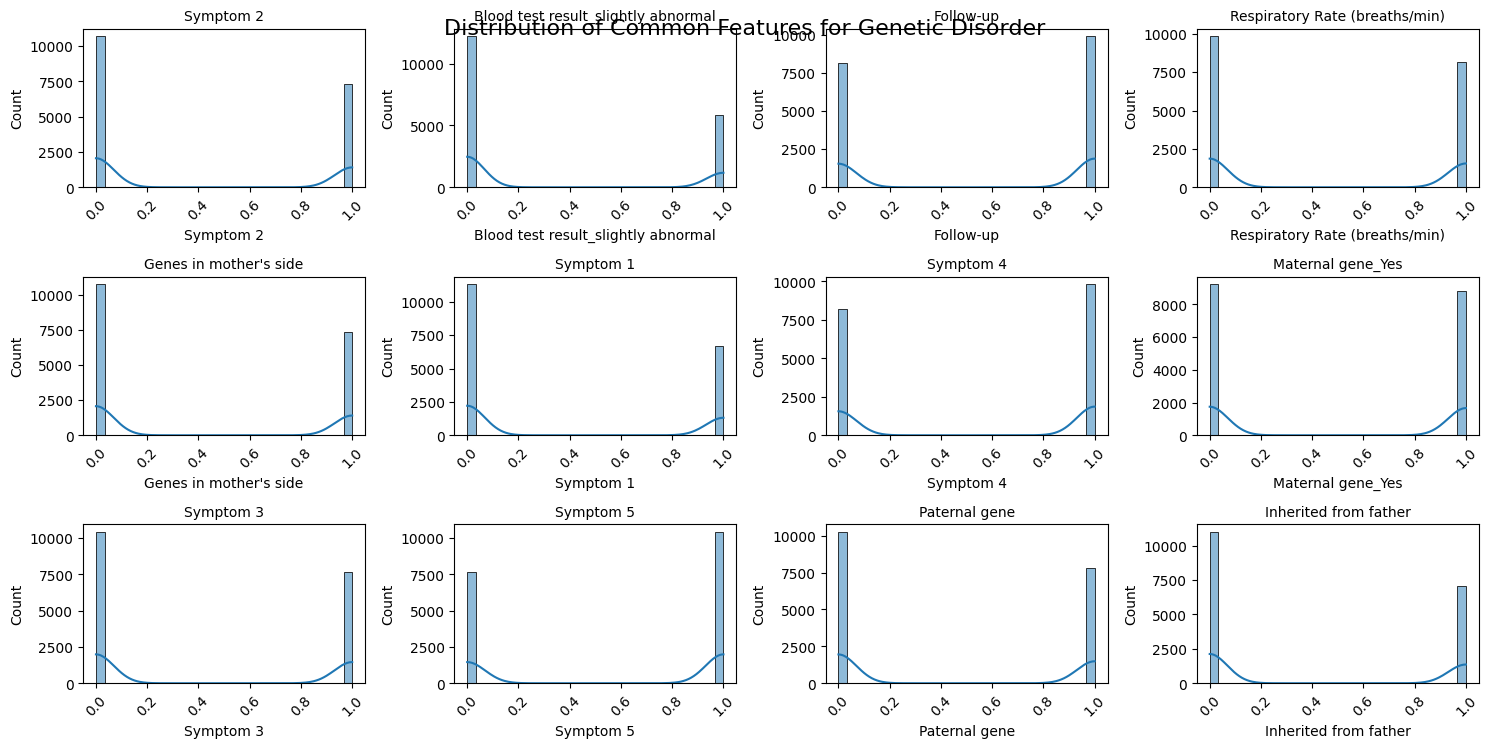

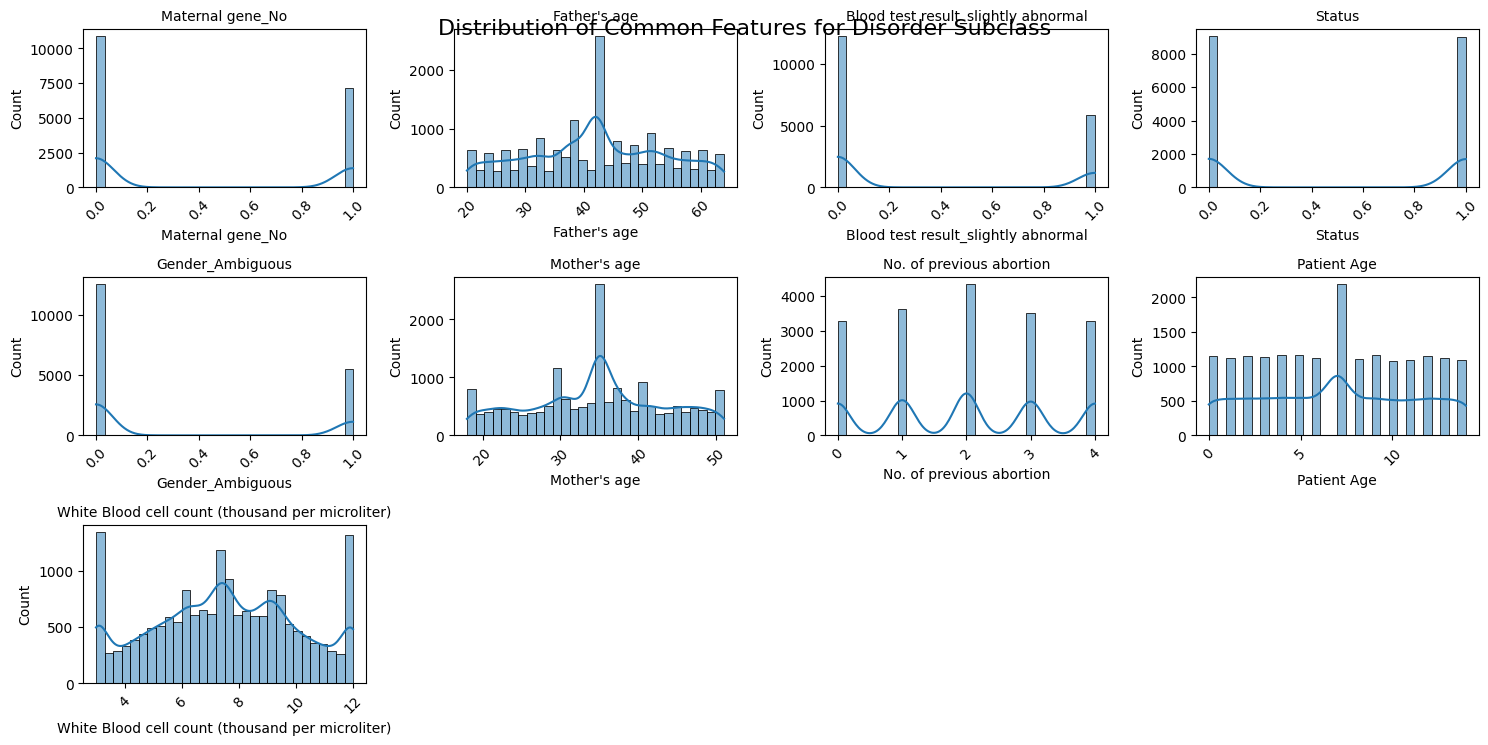

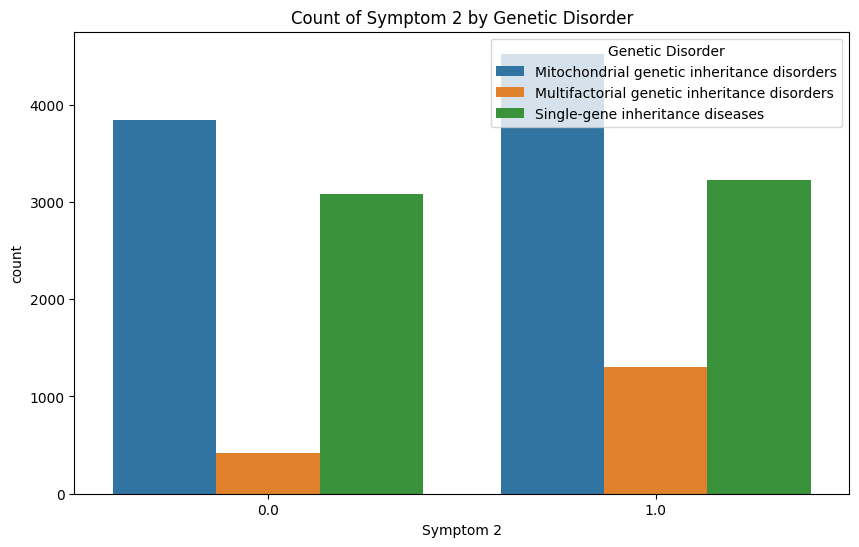

KeyError: 'Blood test result_slightly abnormal'

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming common_GD_features and common_DS_features are already defined
# Example: common_GD_features = ['Feature1', 'Feature2', ...]
# Example: common_DS_features = ['FeatureA', 'FeatureB', ...]

# Visualize common features for Genetic Disorder
def visualize_common_features(features, title):
    plt.figure(figsize=(15, 12))
    for i, feature in enumerate(features):
        plt.subplot(5, 4, i + 1)
        sns.histplot(X[feature], kde=True, bins=30)
        plt.title(feature, fontsize=10)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize common features for Genetic Disorder
visualize_common_features(common_GD_features, "Distribution of Common Features for Genetic Disorder")

# Visualize common features for Disorder Subclass
visualize_common_features(common_DS_features, "Distribution of Common Features for Disorder Subclass")

# Count plots for binary features in common features
def count_plot_binary_features(features, target):
    for feature in features:
        if df[feature].dtype == 'object':  # Check if the feature is categorical
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, hue=target, data=df)
            plt.title(f'Count of {feature} by {target}')
            plt.show()

# Count plots for common features in Genetic Disorder
count_plot_binary_features(common_GD_features, 'Genetic Disorder')

# Count plots for common features in Disorder Subclass
count_plot_binary_features(common_DS_features, 'Disorder Subclass')

# Box plots for continuous features
def box_plot_continuous_features(features, target):
    for feature in features:
        if df[feature].dtype in ['int64', 'float64']:  # Check if the feature is continuous
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target, y=feature, data=df)
            plt.title(f'{feature} vs {target}')
            plt.show()

# Box plots for common features in Genetic Disorder
box_plot_continuous_features(common_GD_features, 'Genetic Disorder')

# Box plots for common features in Disorder Subclass
box_plot_continuous_features(common_DS_features, 'Disorder Subclass')



In [69]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, X_test, y_train, y_test, features):
    """
    Train and evaluate the model on the selected features.
    
    Parameters:
    model: The machine learning model to train
    X_train: The training set features
    X_test: The testing set features
    y_train: The training set target
    y_test: The testing set target
    features: The list of features to be used in training and testing
    
    Returns:
    accuracy: The accuracy score of the model
    """
    # Select only the common features
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]

    # Train the model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return accuracy


# For Genetic Disorder

# Split the data for Genetic Disorder
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify= y1)

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
accuracy_GD = evaluate_model(model_rf, X_train, X_test, y_train, y_test, list(common_GD_features))
print("Accuracy for Genetic Disorder using Random Forest:", accuracy_GD)

model_gb = GradientBoostingClassifier(n_estimators=10)
accuracy_DS = evaluate_model(model_gb, X_train, X_test, y_train, y_test, list(common_GD_features))
print("Accuracy for Disorder Subclass using Gradient Boosting:", accuracy_DS)

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
accuracy_GD_lr = evaluate_model(model_lr, X_train, X_test, y_train, y_test, list(common_GD_features))
print("Accuracy for Genetic Disorder using Logistic Regression:", accuracy_GD_lr)

    


Classification Report:
                                               precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.54      0.94      0.69      1849
Multifactorial genetic inheritance disorders       0.56      0.11      0.19       375
            Single-gene inheritance diseases       0.60      0.15      0.24      1386

                                    accuracy                           0.55      3610
                                   macro avg       0.57      0.40      0.37      3610
                                weighted avg       0.57      0.55      0.46      3610

Accuracy for Genetic Disorder using Random Forest: 0.5506925207756233
Classification Report:
                                               precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.54      0.94      0.68      1849
Multifactorial genetic inheritance disorders       0.00      0.00      0.00       375
            Single

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
#for disordersubclass
# Split the data for Disorder Subclass
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42, stratify= y2)


model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
accuracy_GD = evaluate_model(model_rf, X_train, X_test, y_train, y_test, list(common_DS_features))
print("Accuracy for Genetic Disorder using Random Forest:", accuracy_GD)

model_gb = GradientBoostingClassifier(n_estimators=10)
accuracy_DS = evaluate_model(model_gb, X_train, X_test, y_train, y_test, list(common_DS_features))
print("Accuracy for Disorder Subclass using Gradient Boosting:", accuracy_DS)

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
accuracy_GD_lr = evaluate_model(model_lr, X_train, X_test, y_train, y_test, list(common_DS_features))
print("Accuracy for Genetic Disorder using Logistic Regression:", accuracy_GD_lr)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                      precision    recall  f1-score   support

                        Alzheimer's       0.00      0.00      0.00        27
                             Cancer       0.00      0.00      0.00        18
                    Cystic fibrosis       0.00      0.00      0.00       629
                           Diabetes       0.00      0.00      0.00       331
                    Hemochromatosis       0.00      0.00      0.00       246
Leber's hereditary optic neuropathy       0.00      0.00      0.00       117
                     Leigh syndrome       0.26      0.87      0.40       937
             Mitochondrial myopathy       0.22      0.13      0.16       794
                          Tay-Sachs       0.00      0.00      0.00       511

                           accuracy                           0.25      3610
                          macro avg       0.05      0.11      0.06      3610
                       weighted avg       0.12    

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                      precision    recall  f1-score   support

                        Alzheimer's       0.00      0.00      0.00        27
                             Cancer       0.00      0.00      0.00        18
                    Cystic fibrosis       0.19      0.01      0.02       629
                           Diabetes       0.00      0.00      0.00       331
                    Hemochromatosis       0.00      0.00      0.00       246
Leber's hereditary optic neuropathy       0.00      0.00      0.00       117
                     Leigh syndrome       0.26      0.92      0.40       937
             Mitochondrial myopathy       0.22      0.07      0.11       794
                          Tay-Sachs       0.00      0.00      0.00       511

                           accuracy                           0.26      3610
                          macro avg       0.08      0.11      0.06      3610
                       weighted avg       0.15    

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation Summary for common selected features

### Genetic Disorder Classification

**Random Forest:**
- **Accuracy:** 55.07%
- **Precision:** 56% (weighted avg)
- **Recall:** 55% (weighted avg)
- **F1-Score:** 47% (weighted avg)

**Gradient Boosting:**
- **Accuracy:** 53.38%
- **Precision:** 47% (weighted avg)
- **Recall:** 53% (weighted avg)
- **F1-Score:** 43% (weighted avg)

**Logistic Regression:**
- **Accuracy:** 52.02%
- **Precision:** 57% (weighted avg)
- **Recall:** 52% (weighted avg)
- **F1-Score:** 38% (weighted avg)

### Disorder Subclass Classification

**Random Forest:**
- **Accuracy:** 25.32%
- **Precision:** 14% (weighted avg)
- **Recall:** 25% (weighted avg)
- **F1-Score:** 14% (weighted avg)

**Gradient Boosting:**
- **Accuracy:** 25.60%
- **Precision:** 15% (weighted avg)
- **Recall:** 26% (weighted avg)
- **F1-Score:** 14% (weighted avg)

**Logistic Regression:**
- **Accuracy:** 24.96%
- **Precision:** 12% (weighted avg)
- **Recall:** 25% (weighted avg)
- **F1-Score:** 14% (weighted avg)


test with top20features of RFE for Random froest as it has high accuracy  for rfc_GD_features

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify= y1)


model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
accuracy_GD = evaluate_model(model_rf, X_train, X_test, y_train, y_test, list(rfc_GD_features))
print("Accuracy for Genetic Disorder using Random Forest:", accuracy_GD)

Classification Report:
                                               precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.53      0.98      0.69      1849
Multifactorial genetic inheritance disorders       0.67      0.04      0.08       375
            Single-gene inheritance diseases       0.72      0.09      0.15      1386

                                    accuracy                           0.54      3610
                                   macro avg       0.64      0.37      0.31      3610
                                weighted avg       0.62      0.54      0.42      3610

Accuracy for Genetic Disorder using Random Forest: 0.5379501385041551


## till now we have seen the results on using standard scaler for feature selection and nodel building now trying with with out standard sclaer

resmoving X_train scaled with X_train

In [72]:
# Preprocessing and Splitting Data
X = encoded_df  # Make sure encoded_df is properly created with feature names
y1 = df1['Genetic Disorder']  # Target variable for Genetic Disorder classification

# Split the data for Genetic Disorder
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)
# Recursive Feature Elimination using scaling using random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5) 
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

rfc_GD_features_1 =[]
print("Most Important Features:")
for feature in most_important_features:
    rfc_GD_features_1.append(feature)
    print(feature)

print(rfc_GD_features_1)





Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Genes in mother's side
Inherited from father
Paternal gene
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Maternal gene_No
Maternal gene_Yes
H/O radiation exposure (x-ray)_No
H/O substance abuse_No
Blood test result_slightly abnormal
Follow-up
Respiratory Rate (breaths/min)
['Patient Age', "Father's age", "Mother's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', "Genes in mother's side", 'Inherited from father', 'Paternal gene', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Maternal gene_No', 'Maternal gene_Yes', 'H/O radiation exposure (x-ray)_No', 'H/O substance abuse_No', 'Blood test result_slightly abnormal', 'Follow-up', 'Respiratory Rate (breaths/min)']


In [73]:
rfc_GD_features

['Patient Age',
 "Father's age",
 "Mother's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 "Genes in mother's side",
 'Inherited from father',
 'Paternal gene',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Maternal gene_No',
 'Maternal gene_Yes',
 'H/O substance abuse_Not applicable',
 'H/O substance abuse_Yes',
 'Blood test result_slightly abnormal',
 'Follow-up',
 'Respiratory Rate (breaths/min)']

rfc_GD_features(using standard scaler)
rfc_GD_features_1(not using standard scaler) has the same features

In [74]:

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
accuracy_GD = evaluate_model(model_rf, X_train, X_test, y_train, y_test, list(rfc_GD_features_1))
print("Accuracy for Genetic Disorder using Random Forest:", accuracy_GD)

Classification Report:
                                               precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.53      0.98      0.69      1849
Multifactorial genetic inheritance disorders       0.70      0.02      0.04       375
            Single-gene inheritance diseases       0.73      0.08      0.14      1386

                                    accuracy                           0.54      3610
                                   macro avg       0.65      0.36      0.29      3610
                                weighted avg       0.62      0.54      0.41      3610

Accuracy for Genetic Disorder using Random Forest: 0.535180055401662


Checking with Random forest classifier 

In [ ]:

# Preprocessing and Splitting Data
X = encoded_df  # Make sure encoded_df is properly created with feature names
y1 = df1['Genetic Disorder']  # Target variable for Genetic Disorder classification

# Split the data for Genetic Disorder
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42, stratify=y1)

# Recursive Feature Elimination using Random Forest Classifier (No Scaling)
model = RandomForestClassifier(n_estimators=100, max_depth=5)
selector = RFE(model, n_features_to_select=20)
X_train_rfe = selector.fit_transform(X_train, y_train)  # Selecting top features without scaling
X_test_rfe = selector.transform(X_test)

# Get the feature rankings
feature_rankings = selector.ranking_

# Combine feature names and rankings
feature_names = X_train.columns
feature_ranking_tuples = list(zip(feature_names, feature_rankings))

# Sort the list of tuples based on rankings
sorted_feature_ranking_tuples = sorted(feature_ranking_tuples, key=lambda x: x[1])

# Get the most important features
most_important_features = [feature for feature, rank in sorted_feature_ranking_tuples if rank == 1]

# Print the most important features
rfc_GD_features = []
print("Most Important Features:")
for feature in most_important_features:
    rfc_GD_features.append(feature)
    print(feature)

# Model Training and Evaluation using the selected features
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rf.fit(X_train_rfe, y_train)  # Training on the top selected features
y_pred = model_rf.predict(X_test_rfe)  # Predicting on the test data

# Evaluate Accuracy
accuracy_GD = accuracy_score(y_test, y_pred)
print("Accuracy for Genetic Disorder using Random Forest:", accuracy_GD)


Most Important Features:
Patient Age
Father's age
Mother's age
No. of previous abortion
White Blood cell count (thousand per microliter)
Genes in mother's side
Inherited from father
Paternal gene
History of anomalies in previous pregnancies
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Maternal gene_No
Maternal gene_Yes
Birth asphyxia_No record
H/O substance abuse_Not applicable
Blood test result_slightly abnormal
Respiratory Rate (breaths/min)
Accuracy for Genetic Disorder using Random Forest: 0.5434903047091413


Do not have much difference of using Standard Scaler and not using standard scaler now testing with Lazy predict with the features selected by RFE method algoriyhms and see the best accuracy of different algorithms

In [79]:
from lazypredict.Supervised import LazyClassifier
X = encoded_df  # Make sure encoded_df is properly created with feature names
y1 = df1['Genetic Disorder']
# Assuming you have your dataset in `X` (features) and `y` (target)

# Select top 20 features for Random Forest, Gradient Boosting, and Logistic Regression
X_rf = X[rfc_GD_features]  # Replace with actual feature names
X_gb = X[gb_GD_features]  # Replace with actual feature names
X_lr = X[lr_GD_features]  # Replace with actual feature names

# Split the data for each feature set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y1, test_size=0.2, random_state=42)
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y1, test_size=0.2, random_state=42)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y1, test_size=0.2, random_state=42)

In [78]:
import lazypredict
print(lazypredict.__file__)


/usr/local/python/3.10.13/lib/python3.10/site-packages/lazypredict/__init__.py


In [80]:
# Evaluate Random Forest features
clf_rf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_rf, predictions_rf = clf_rf.fit(X_train_rf, X_test_rf, y_train_rf, y_test_rf)

# Evaluate Gradient Boosting features
clf_gb = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_gb, predictions_gb = clf_gb.fit(X_train_gb, X_test_gb, y_train_gb, y_test_gb)

# Evaluate Logistic Regression features
clf_lr = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_lr, predictions_lr = clf_lr.fit(X_train_lr, X_test_lr, y_train_lr, y_test_lr)


 42%|████▏     | 13/31 [00:14<00:40,  2.26s/it]

: 

In [ ]:
# Evaluate Random Forest features
clf_rf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_rf, predictions_rf = clf_rf.fit(X_train_rf, X_test_rf, y_train_rf, y_test_rf)

# Evaluate Gradient Boosting features
clf_gb = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_gb, predictions_gb = clf_gb.fit(X_train_gb, X_test_gb, y_train_gb, y_test_gb)

# Evaluate Logistic Regression features
clf_lr = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_lr, predictions_lr = clf_lr.fit(X_train_lr, X_test_lr, y_train_lr, y_test_lr)


In [ ]:
# Perform feature selection for both targets
results_chi_1 = chi_square_selection(X_encoded_chi2, y1, feature_names, "Genetic Disorder")


results_chi_2 = chi_square_selection(X_encoded_chi2, y2, feature_names, "Disorder Subclass")


NameError: name 'X_encoded_chi2' is not defined

Chi2 test Visualisation

C:\Users\Veera\AppData\Local\Temp\ipykernel_6792\1646424515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.values, y=results.index, palette="viridis")


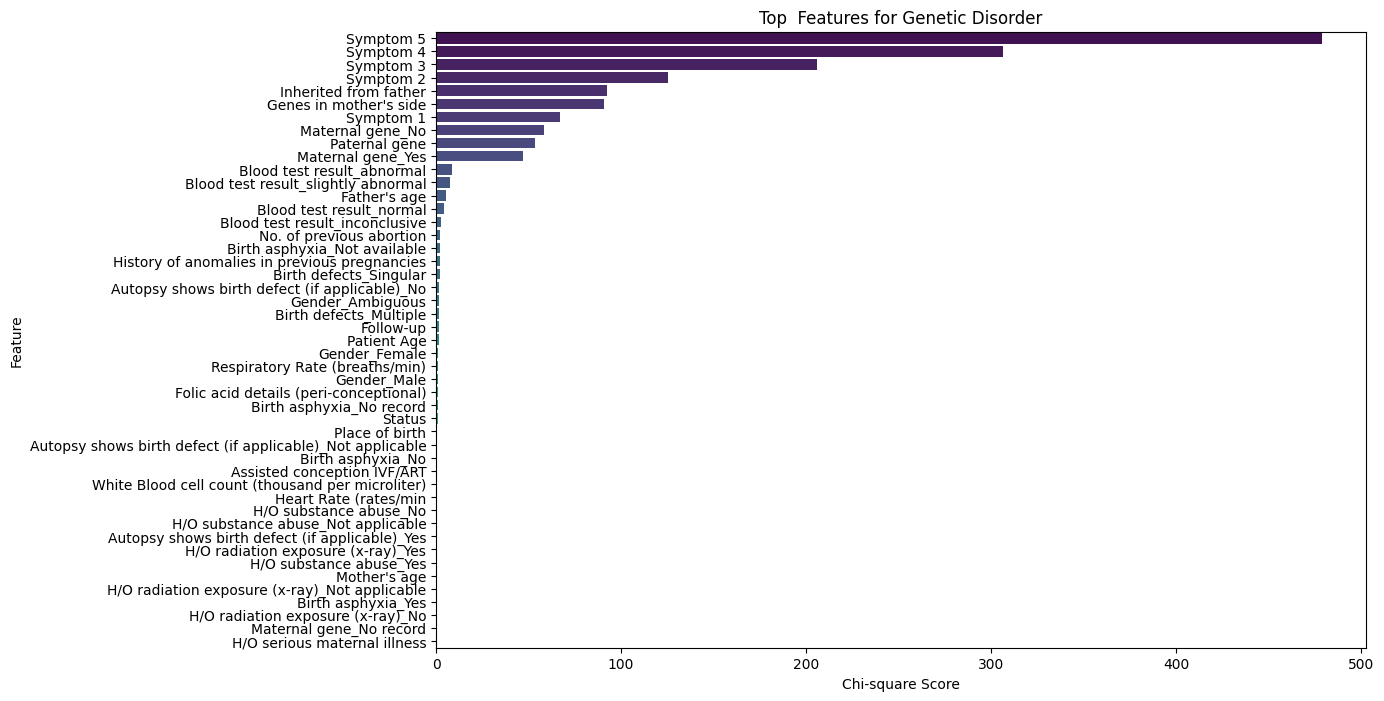

C:\Users\Veera\AppData\Local\Temp\ipykernel_6792\1646424515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.values, y=results.index, palette="viridis")


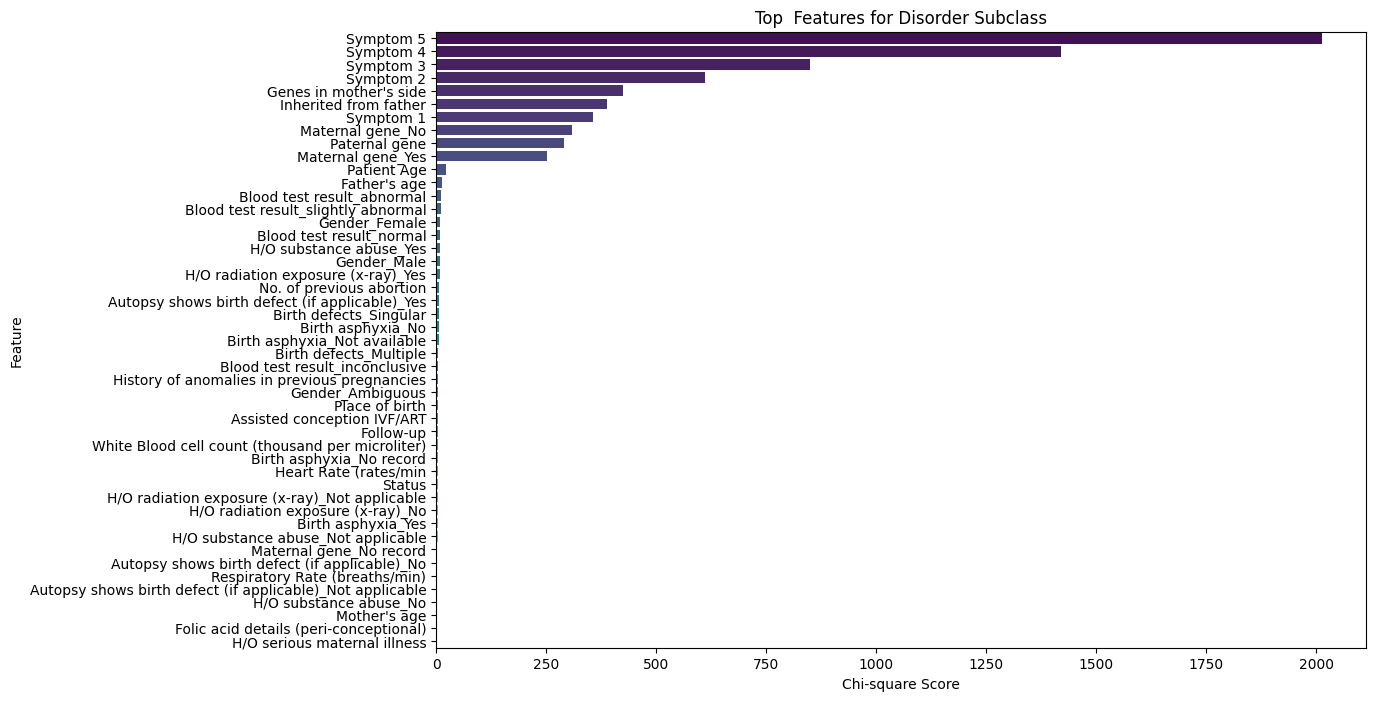

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_top_features(results, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=results.values, y=results.index, palette="viridis")
    plt.title(title)
    plt.xlabel('Chi-square Score')
    plt.ylabel('Feature')
    plt.show()

# Plotting the top 10 features for each target
plot_top_features(results_chi_1, "Top  Features for Genetic Disorder")
plot_top_features(results_chi_2, "Top  Features for Disorder Subclass")

In [ ]:
# Combine Chi-square results for both targets
combined_chi2_results = pd.concat([results_chi_1, results_chi_2], axis=1, keys=['Genetic Disorder', 'Disorder Subclass'])

# Sum the Chi-square scores to get a combined importance score
combined_chi2_results['Combined Score'] = combined_chi2_results.sum(axis=1)

# Sort features by the combined score
top_features_combined = combined_chi2_results['Combined Score'].sort_values(ascending=False)

# Extract top 20 features
top_20_features = top_features_combined.head(20)
print("Top 20 Features:")
print(top_20_features)


Top 20 Features:
Symptom 5                              2491.515804
Symptom 4                              1726.310916
Symptom 3                              1056.128552
Symptom 2                               735.990033
Genes in mother's side                  515.817554
Inherited from father                   480.529560
Symptom 1                               423.401289
Maternal gene_No                        366.621183
Paternal gene                           344.334187
Maternal gene_Yes                       299.341678
Patient Age                              25.129867
Blood test result_abnormal               20.546029
Father's age                             20.304013
Blood test result_slightly abnormal      18.848613
Blood test result_normal                 13.436572
Gender_Female                            11.378591
No. of previous abortion                  9.917876
Gender_Male                               9.150754
Birth defects_Singular                    8.554567
H/O substance 

In [ ]:
# Create DataFrame with feature names
X_encoded_df = pd.DataFrame(X_encoded_chi2, columns=feature_names)
print("Columns in Encoded DataFrame:")
print(X_encoded_df.columns)


Columns in Encoded DataFrame:
Index(['Patient Age', 'Father's age', 'Mother's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)',
       'Genes in mother's side', 'Inherited from father', 'Paternal gene',
       'Status', 'Place of birth', 'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Maternal gene_No',
       'Maternal gene_No record', 'Maternal gene_Yes', 'Gender_Ambiguous',
       'Gender_Female', 'Gender_Male', 'Birth asphyxia_No',
       'Birth asphyxia_No record', 'Birth asphyxia_Not available',
       'Birth asphyxia_Yes', 'Autopsy shows birth defect (if applicable)_No',
       'Autopsy shows birth defect (if applicable)_Not applicable',
       'Autopsy shows birth defect (if applicable)_Yes',
       'H/O radiation exposure (x-ray)_No',
    

In [ ]:
X_encoded_df

,Patient Age,Father's age,Mother's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Paternal gene,Status,Place of birth,...,H/O substance abuse_Yes,Birth defects_Multiple,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Follow-up,Respiratory Rate (breaths/min),Heart Rate (rates/min
0,2.0,42.0,35.0,2.0,9.86,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6.0,22.0,41.0,4.0,5.93,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12.0,36.0,21.0,1.0,7.92,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,11.0,48.0,32.0,4.0,4.10,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,14.0,42.0,35.0,0.0,10.27,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,9.0,50.0,47.0,2.0,12.00,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18043,4.0,64.0,35.0,3.0,6.58,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18044,8.0,56.0,38.0,2.0,7.04,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18045,8.0,51.0,35.0,2.0,7.72,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Filter dataset to keep only top 20 features from the encoded DataFrame
top_20_feature_names = top_20_features.index
X_top_20 = X_encoded_df[top_20_feature_names]

print("Top 20 Features in the Encoded Dataset:")

X_top_20


Top 20 Features in the Encoded Dataset:


,Symptom 5,Symptom 4,Symptom 3,Symptom 2,Genes in mother's side,Inherited from father,Symptom 1,Maternal gene_No,Paternal gene,Maternal gene_Yes,Patient Age,Blood test result_abnormal,Father's age,Blood test result_slightly abnormal,Blood test result_normal,Gender_Female,No. of previous abortion,Gender_Male,Birth defects_Singular,H/O substance abuse_Yes
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,42.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,22.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,48.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,0.0,42.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,0.0,50.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
18043,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,64.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
18044,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,0.0,56.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
18045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,51.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0


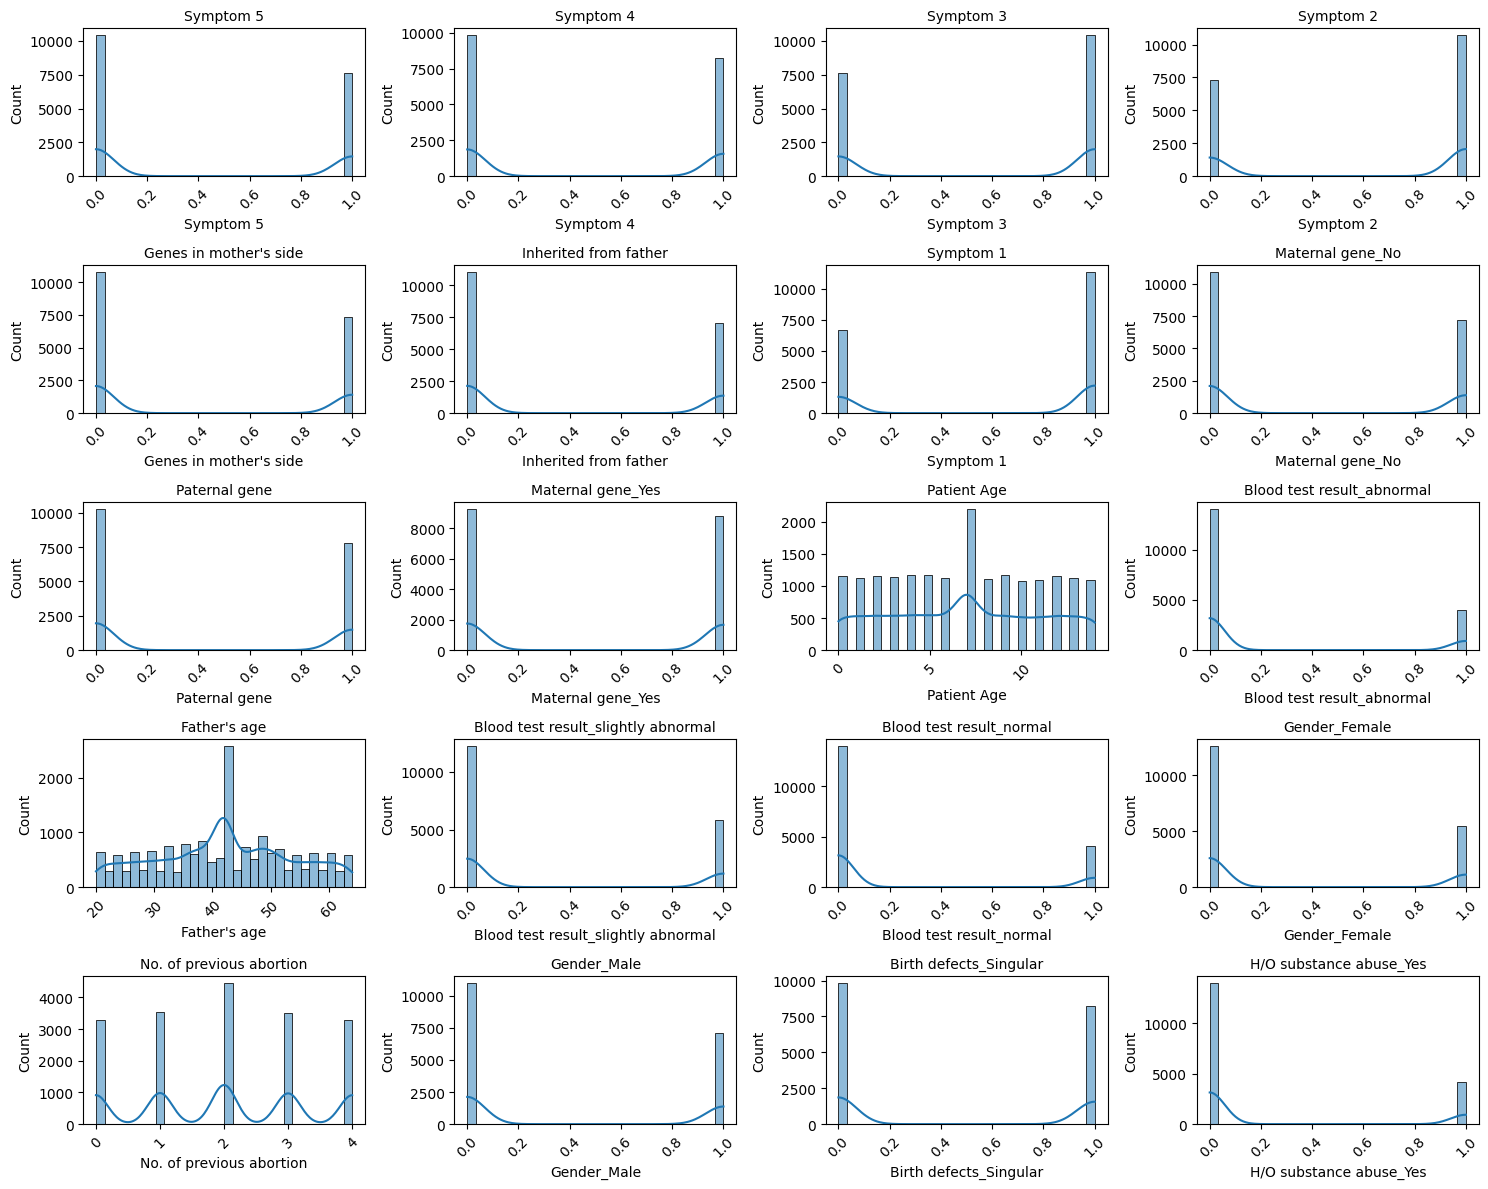

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Top 20 Features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(X_top_20.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(X_top_20[feature], kde=True, bins=30)
    plt.title(feature, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
X_top_20.columns

Index(['Symptom 5', 'Symptom 4', 'Symptom 3', 'Symptom 2',
       'Genes in mother's side', 'Inherited from father', 'Symptom 1',
       'Maternal gene_No', 'Paternal gene', 'Maternal gene_Yes', 'Patient Age',
       'Blood test result_abnormal', 'Father's age',
       'Blood test result_slightly abnormal', 'Blood test result_normal',
       'Gender_Female', 'No. of previous abortion', 'Gender_Male',
       'Birth defects_Singular', 'H/O substance abuse_Yes'],
      dtype='object')

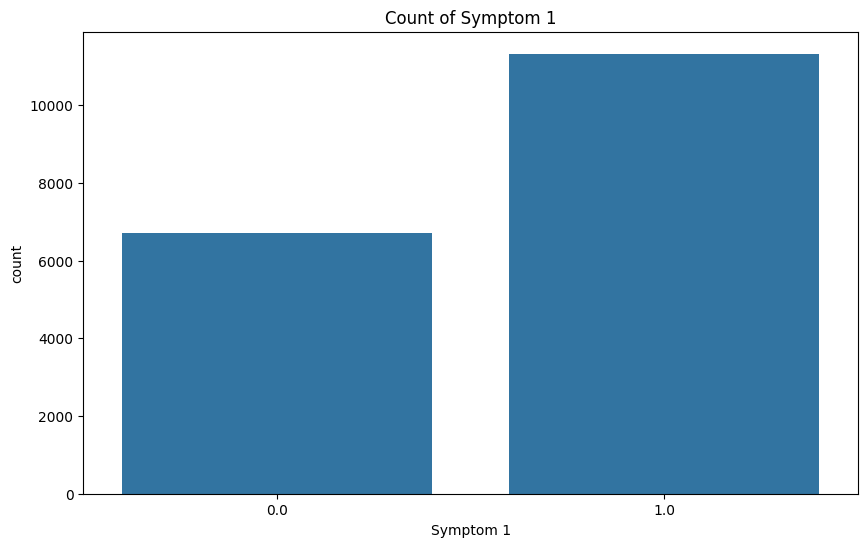

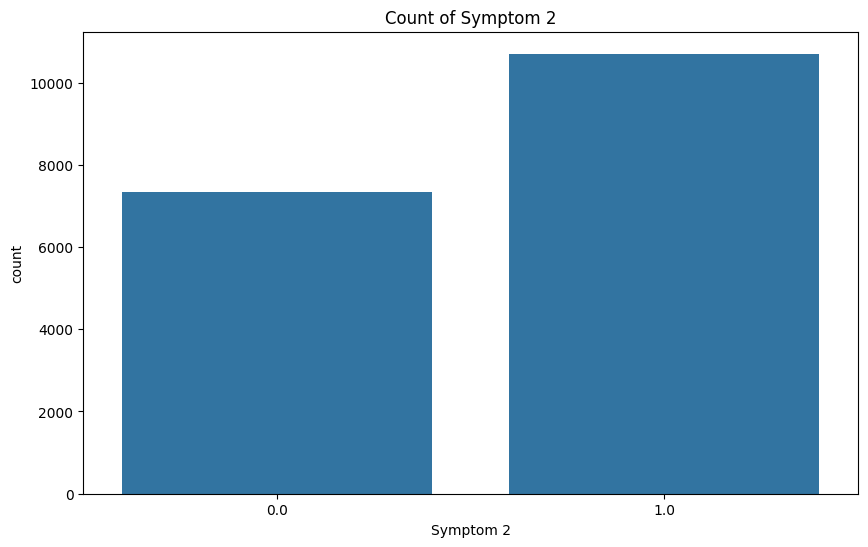

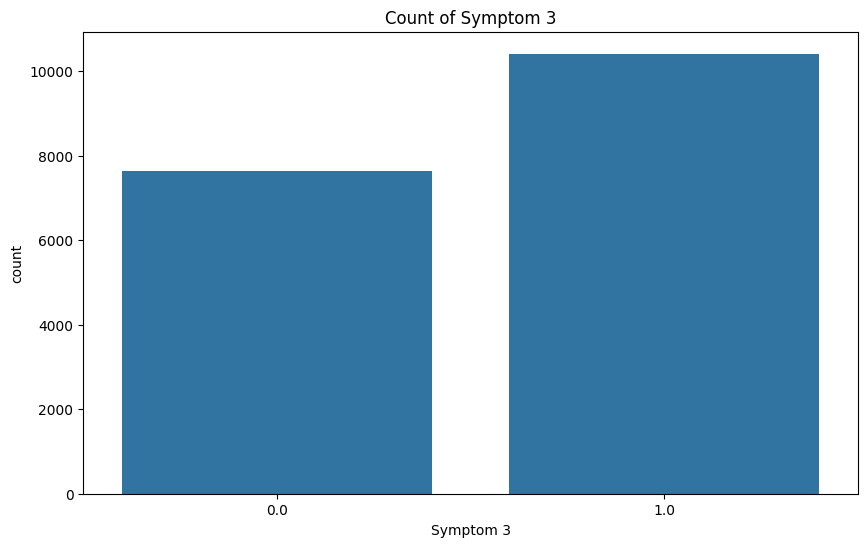

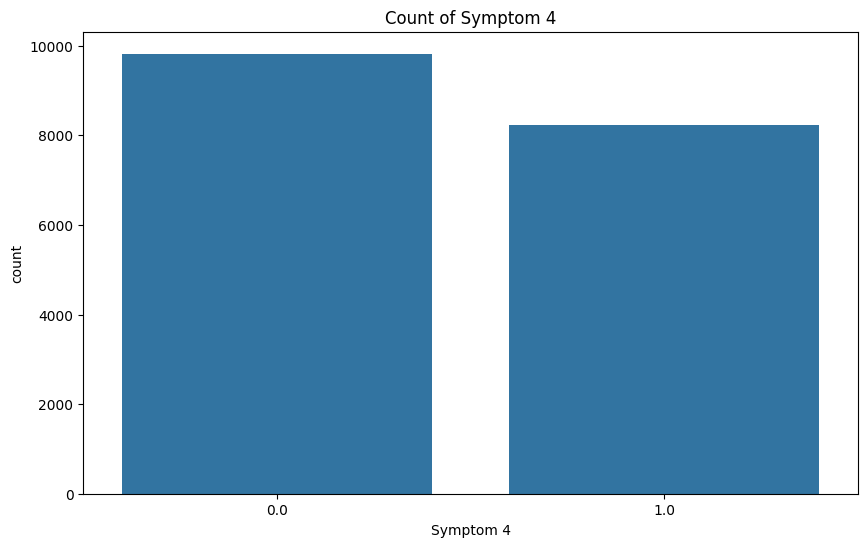

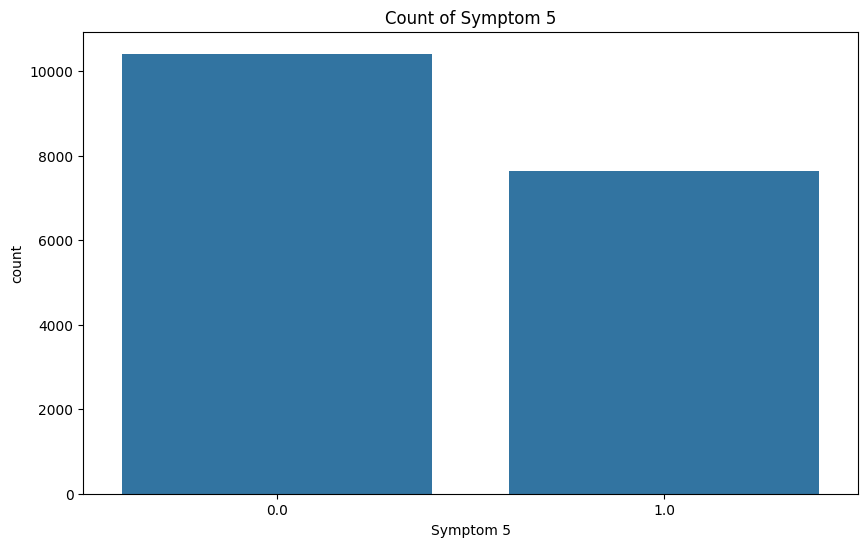

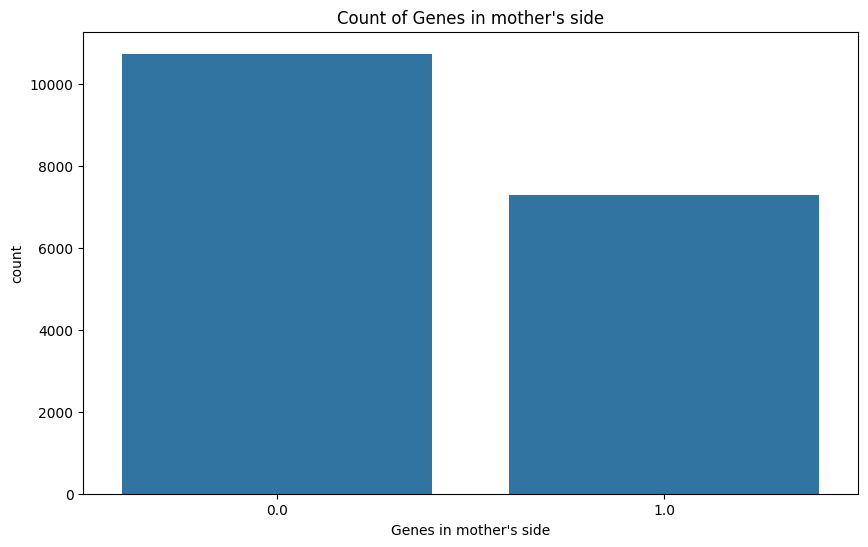

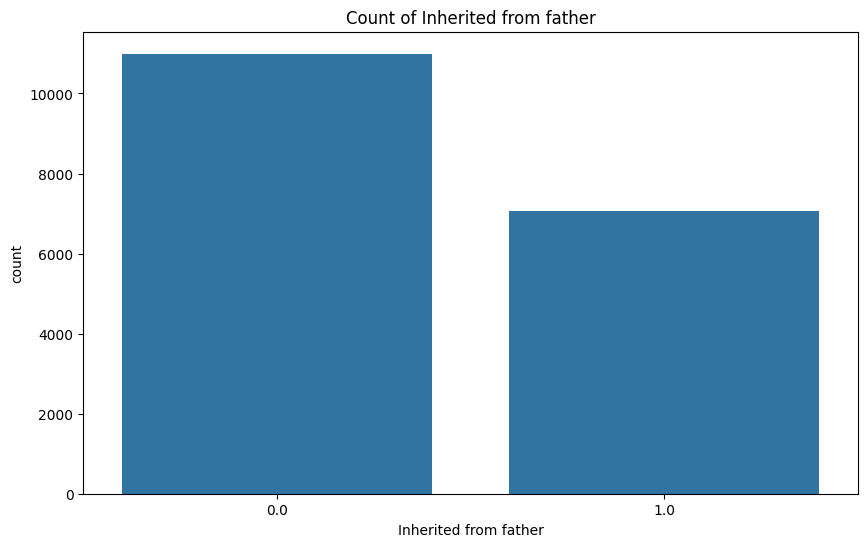

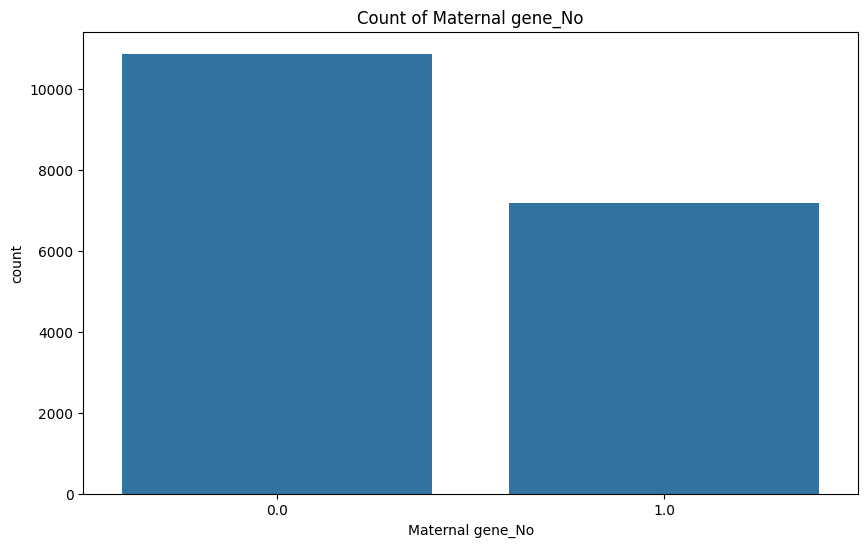

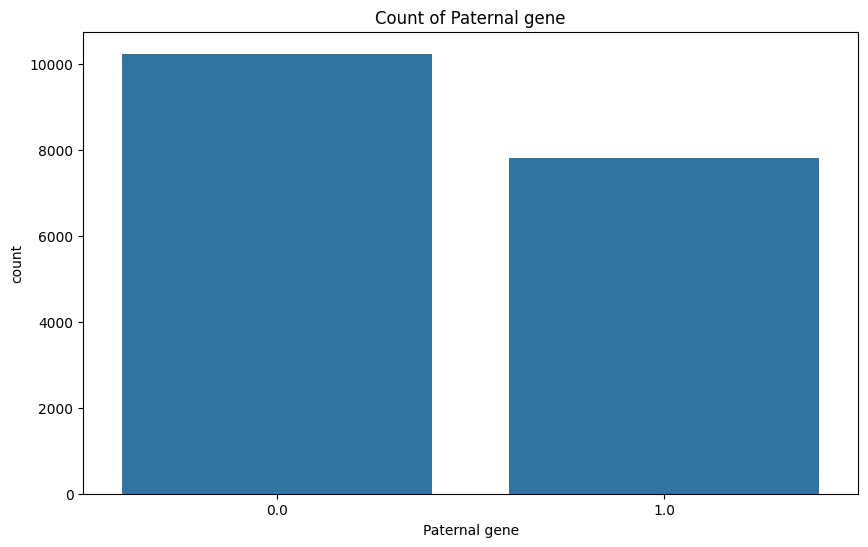

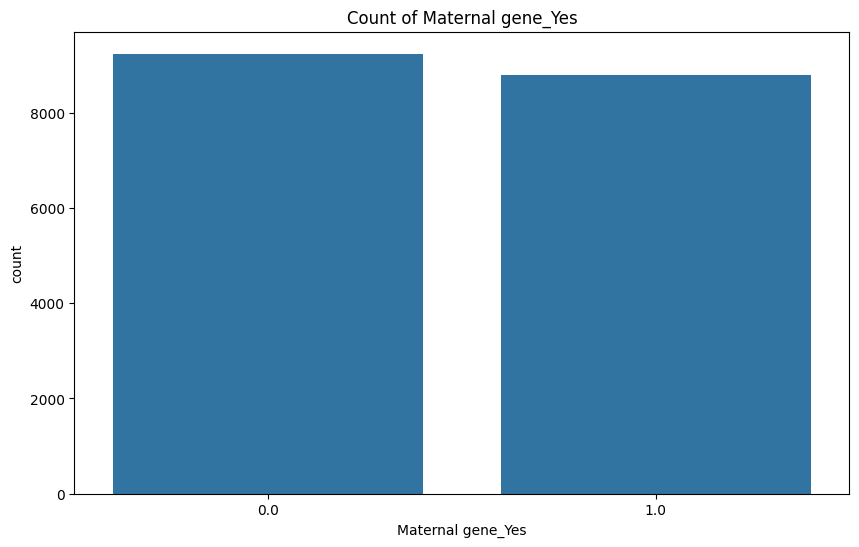

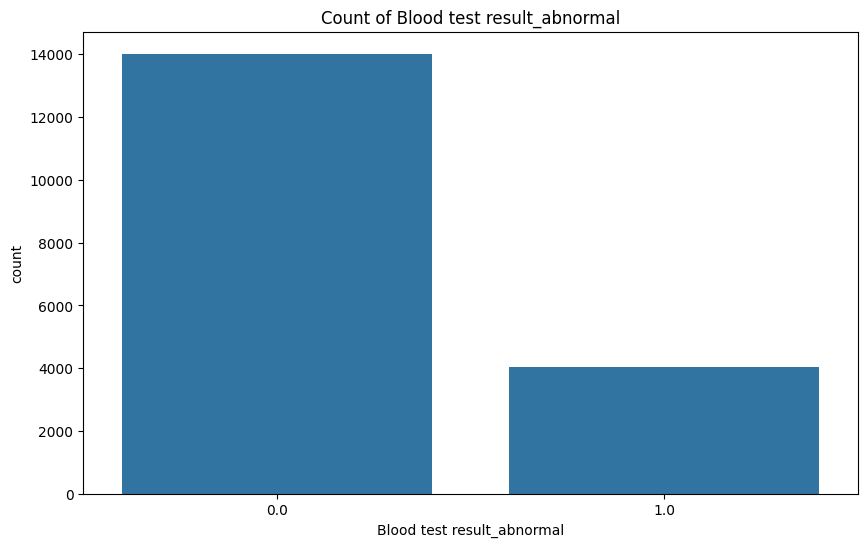

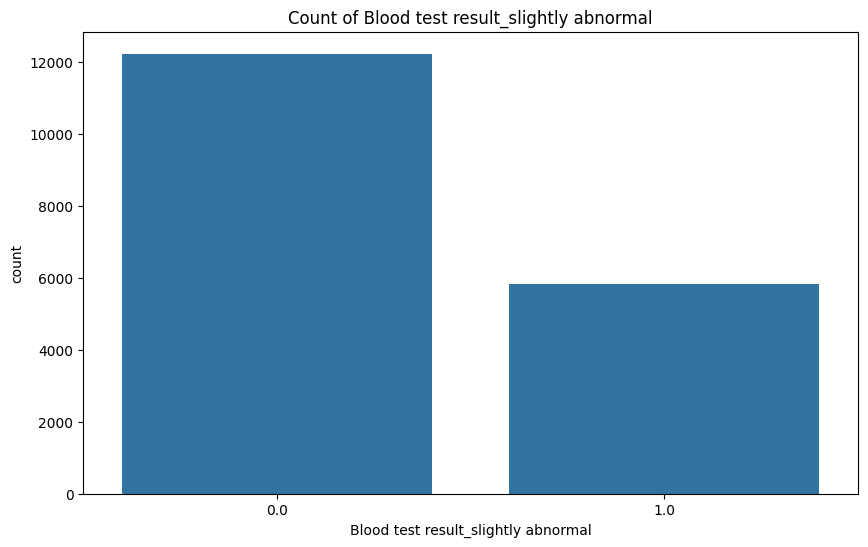

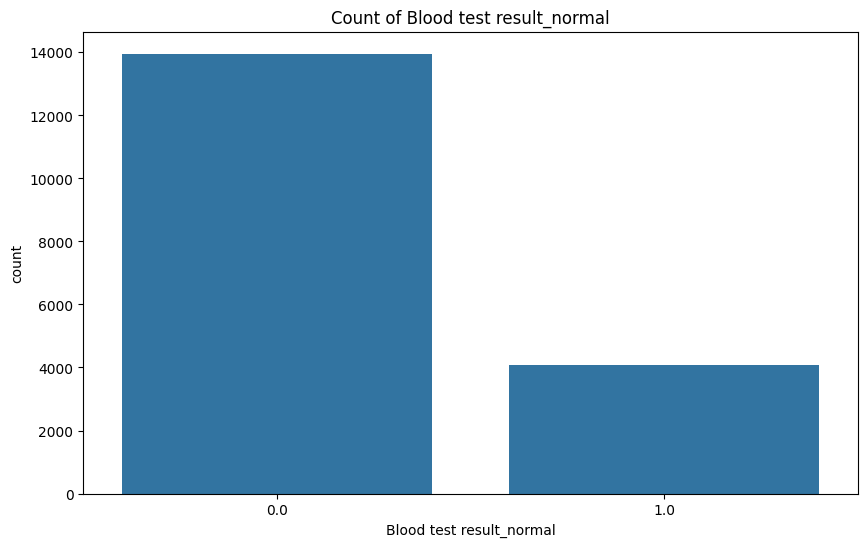

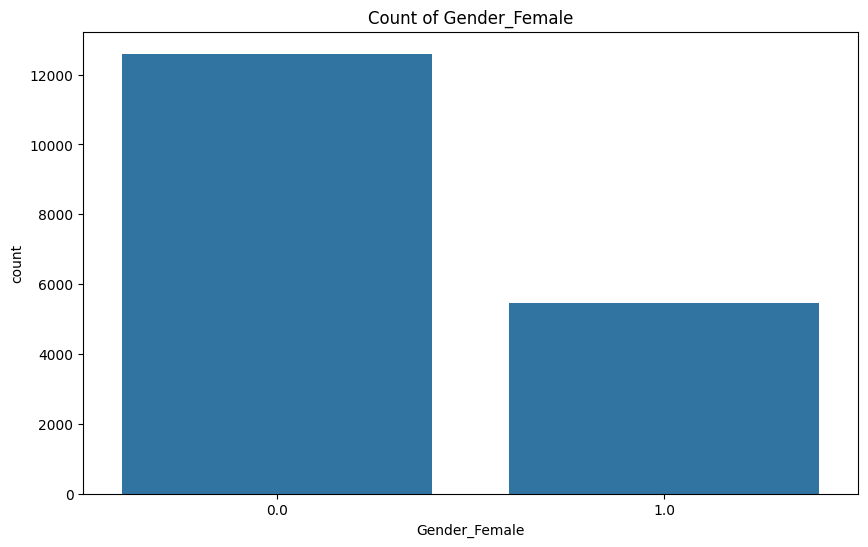

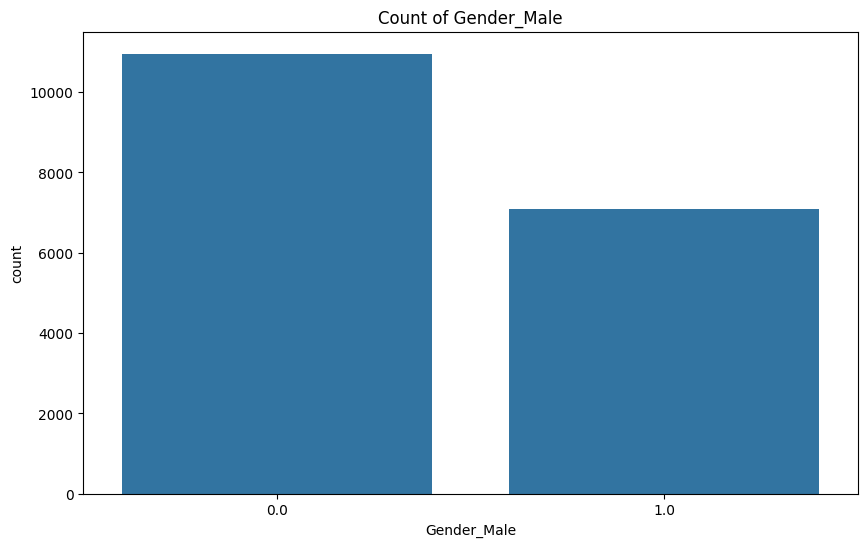

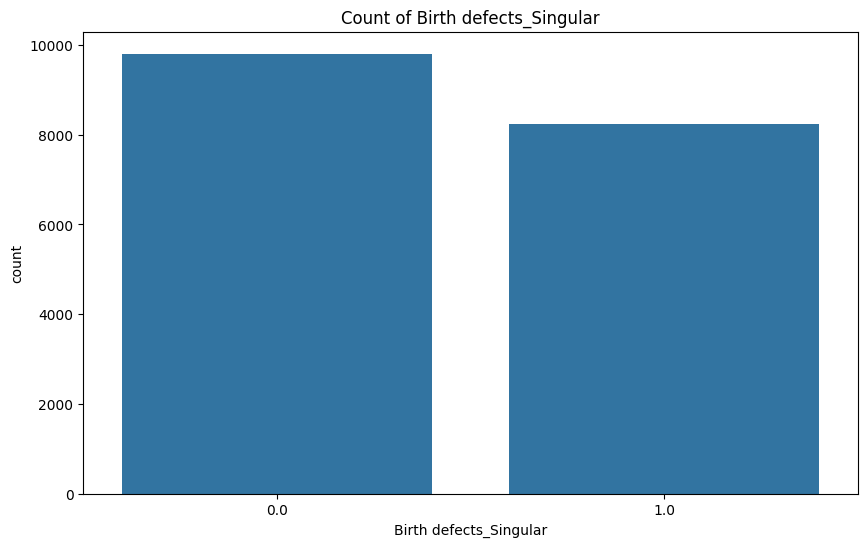

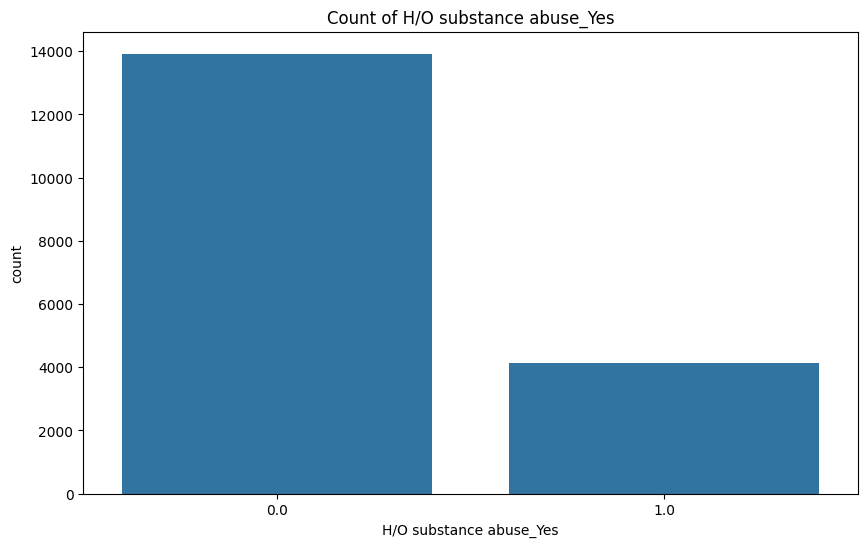

In [ ]:
binary_features_chi = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 
                   'Genes in mother\'s side', 'Inherited from father', 'Maternal gene_No', 
                   'Paternal gene', 'Maternal gene_Yes', 'Blood test result_abnormal', 
                   'Blood test result_slightly abnormal', 'Blood test result_normal', 
                   'Gender_Female', 'Gender_Male', 'Birth defects_Singular', 
                   'H/O substance abuse_Yes']

for column in binary_features_chi:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=X_top_20[column])
    plt.title(f'Count of {column}')
    plt.show()


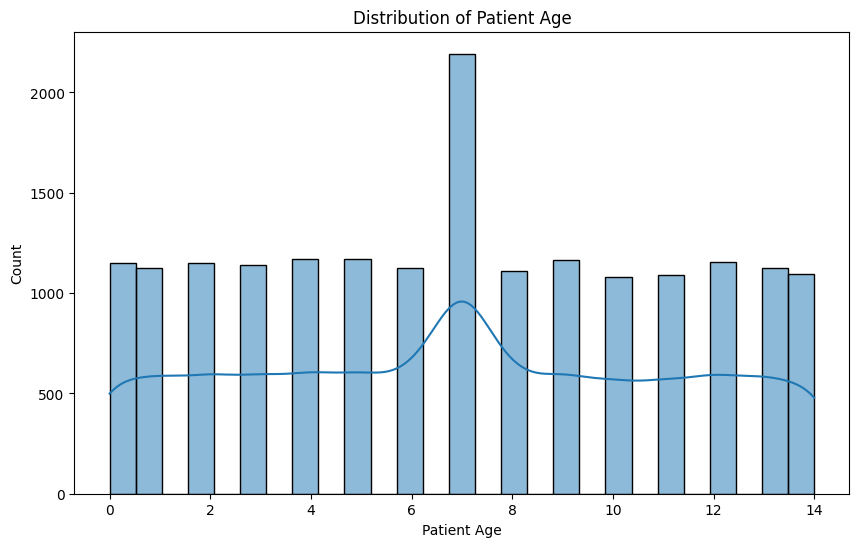

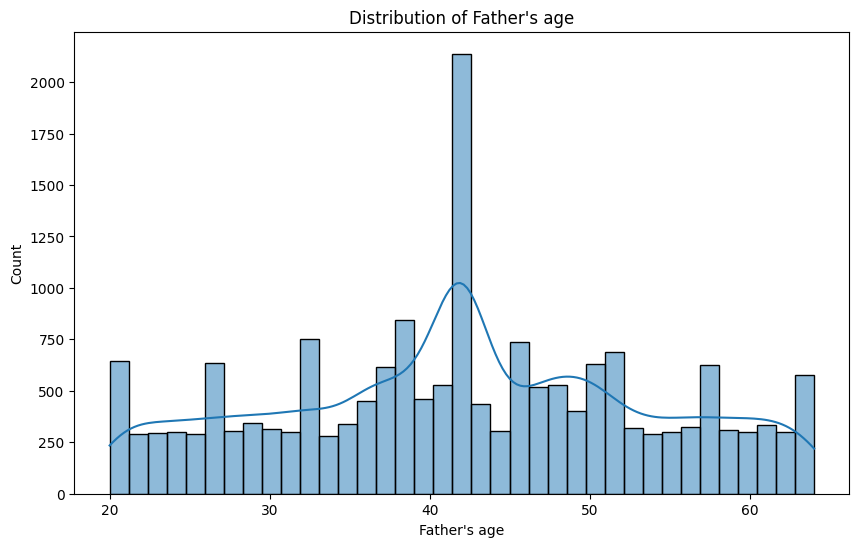

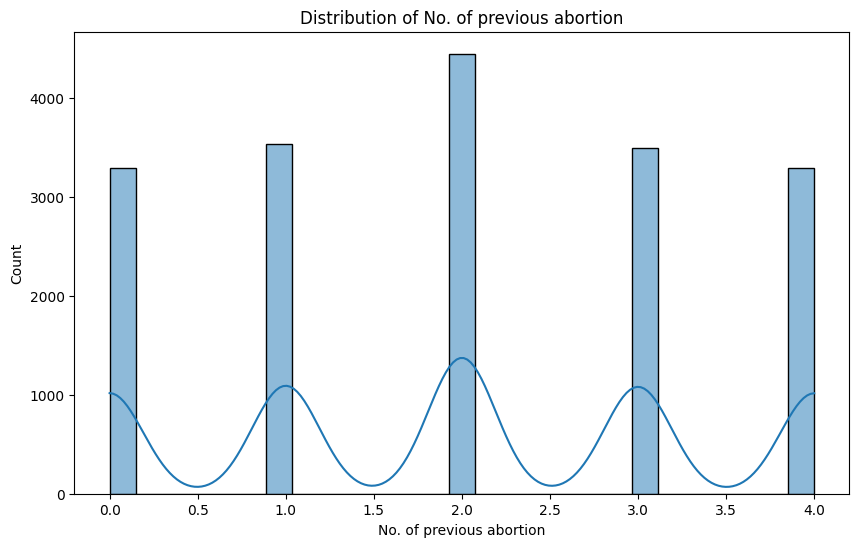

In [ ]:
#distribution of continuous features
continuous_features = ['Patient Age', 'Father\'s age', 'No. of previous abortion']

for column in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_top_20[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


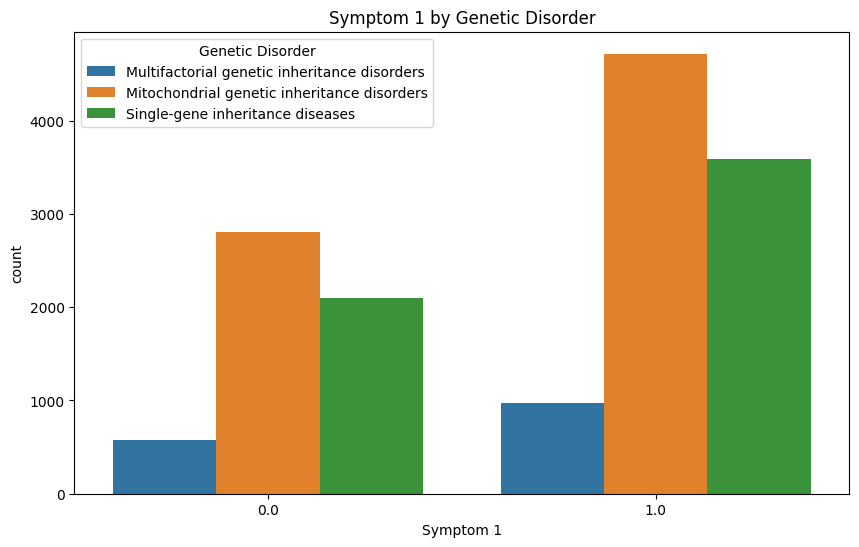

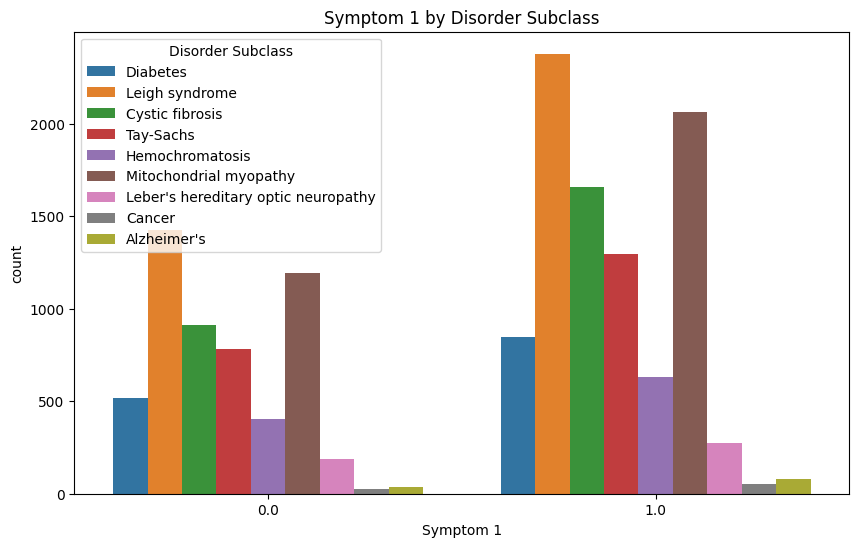

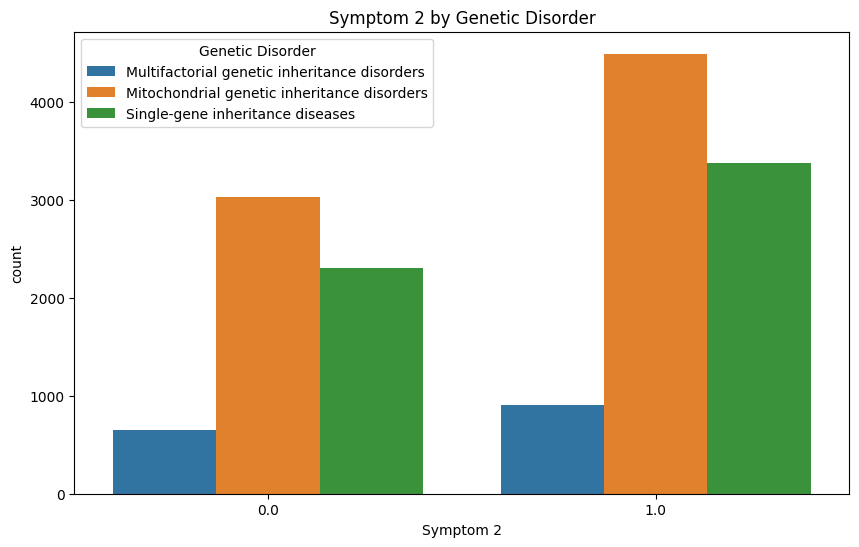

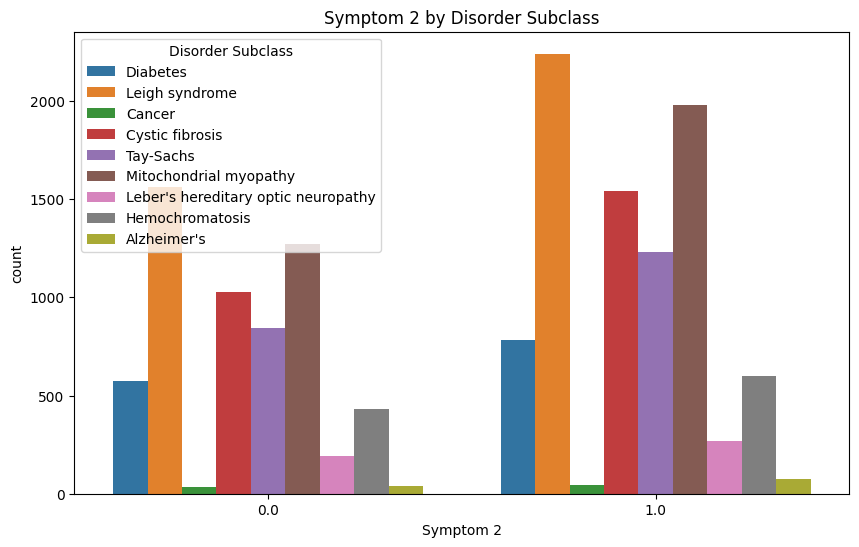

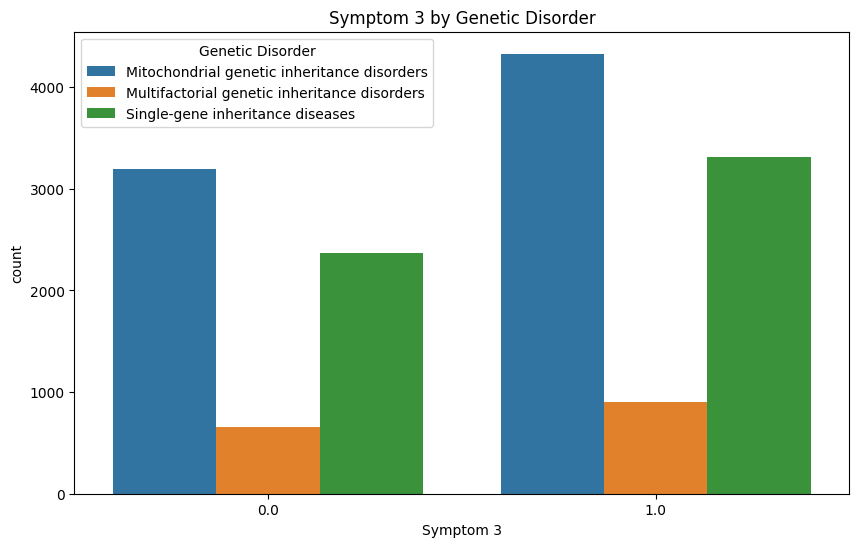

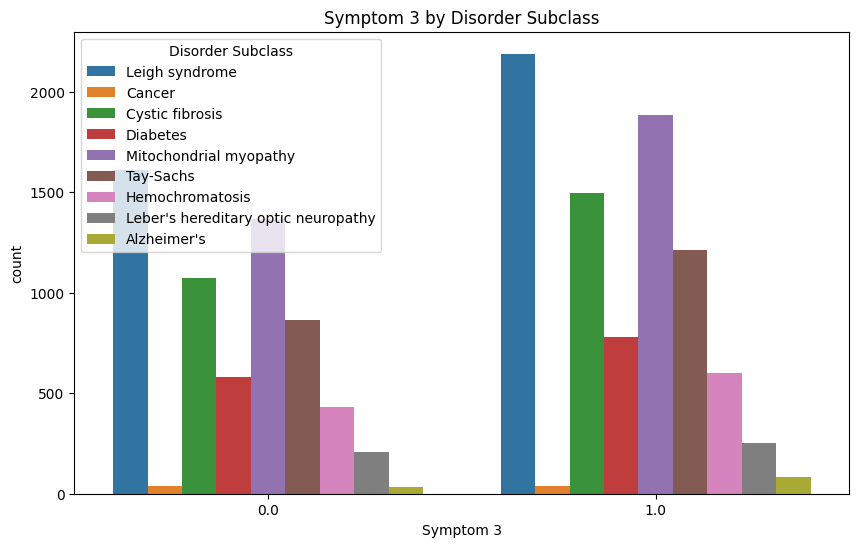

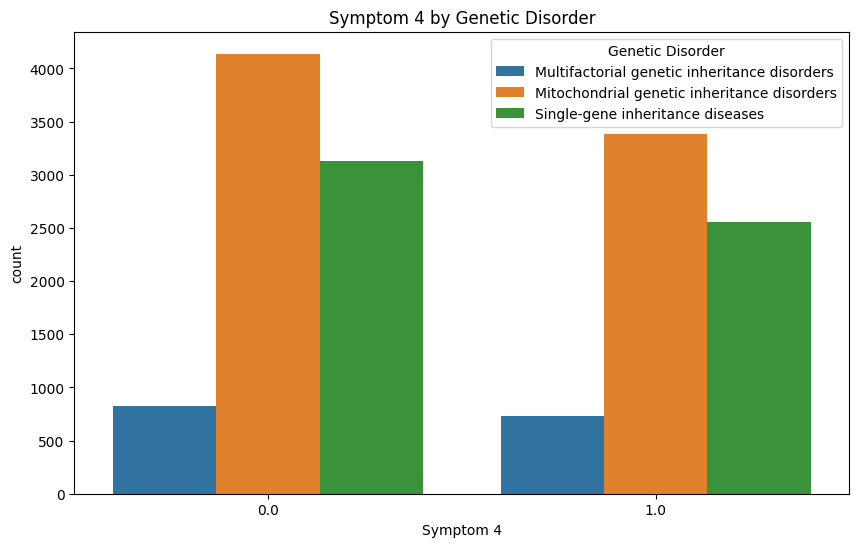

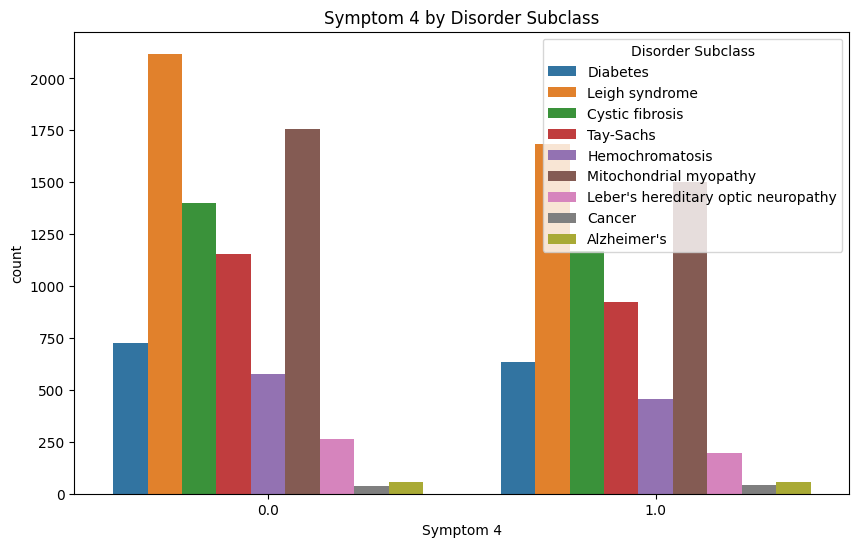

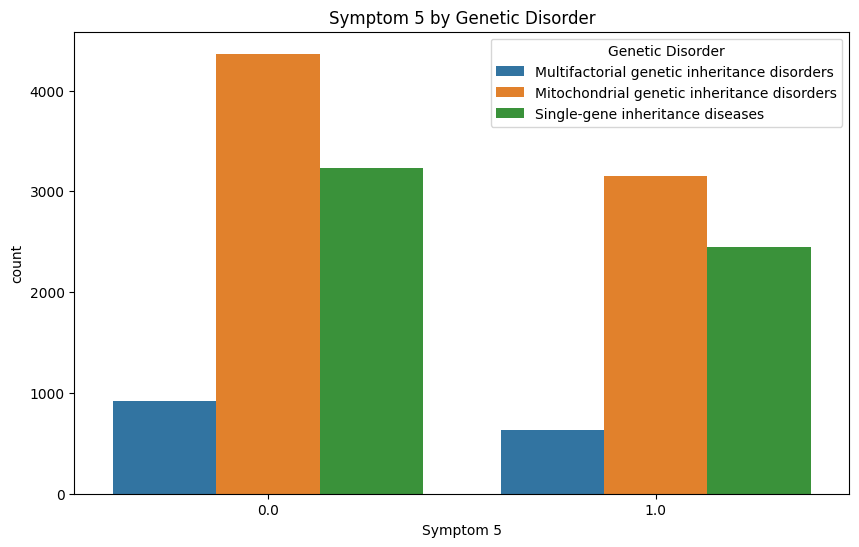

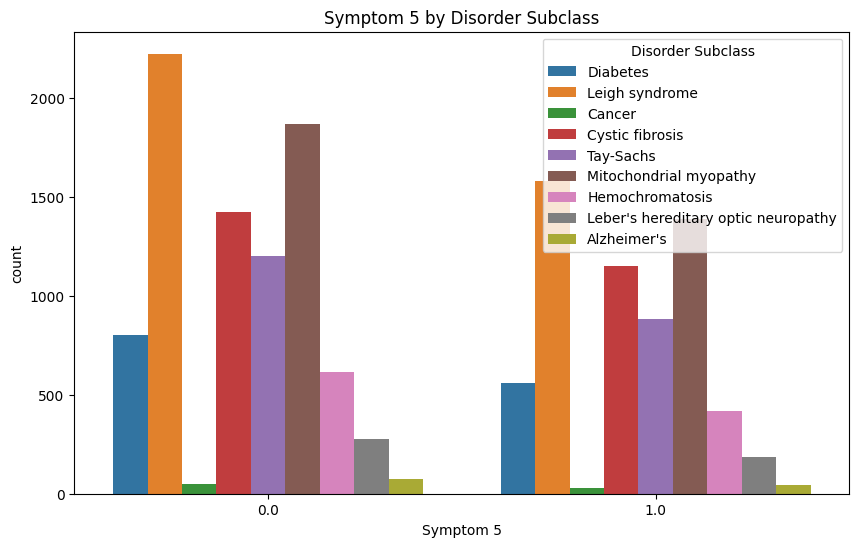

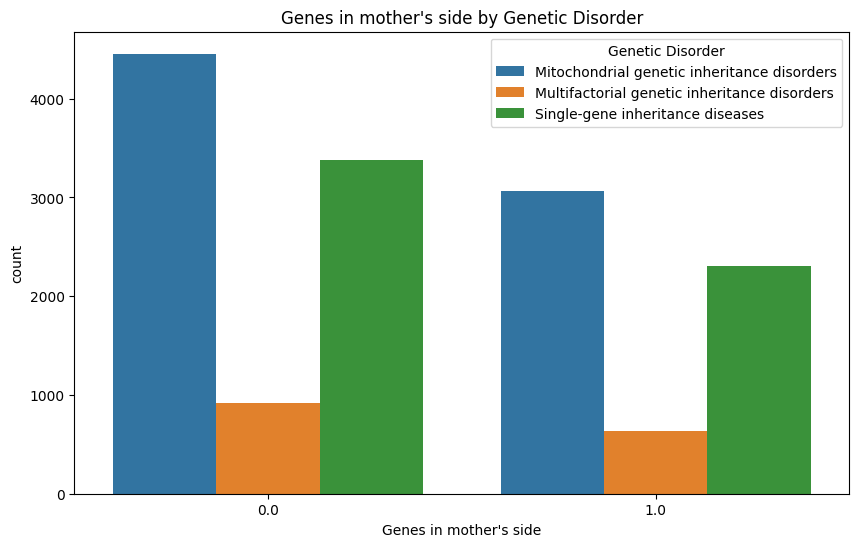

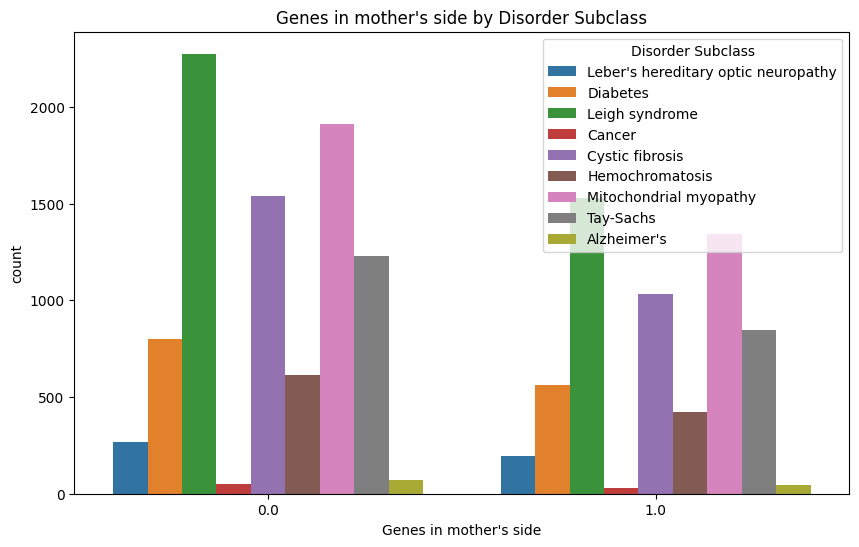

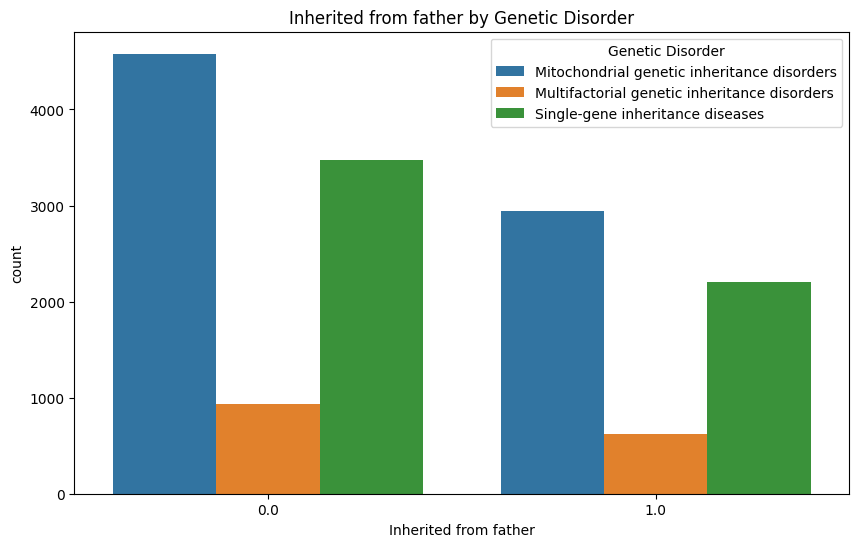

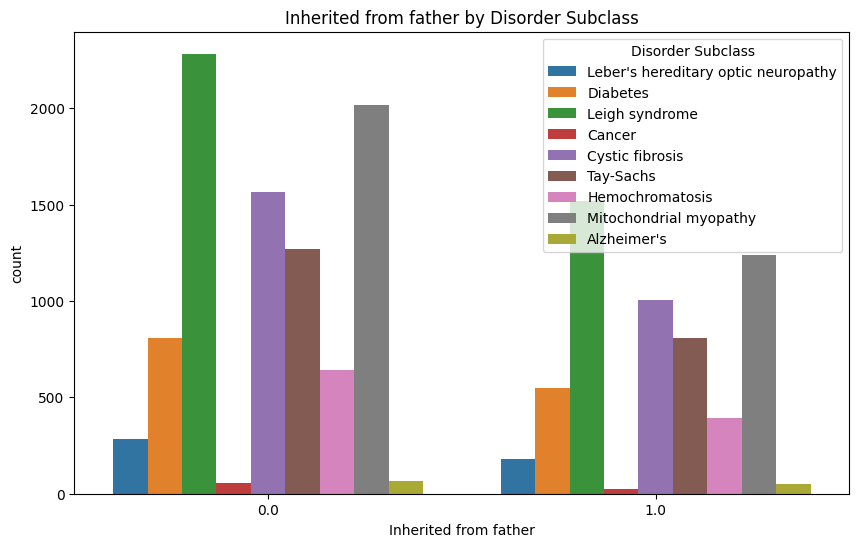

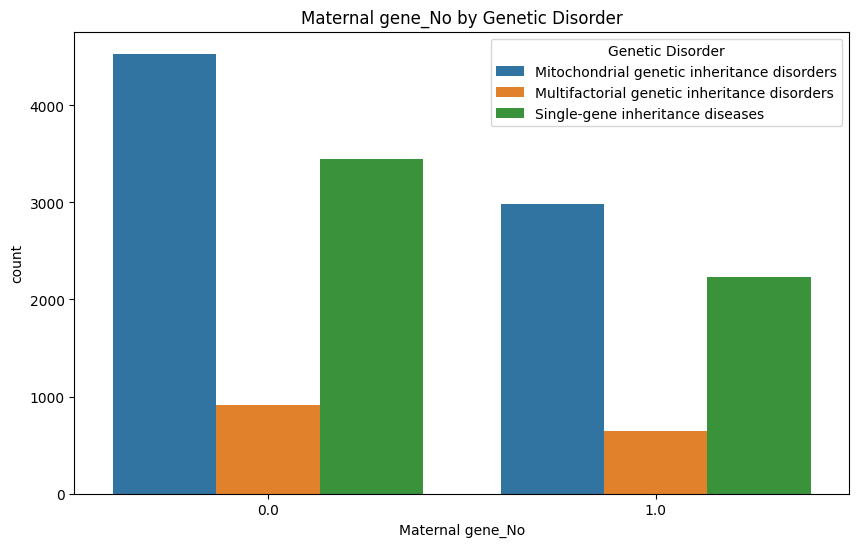

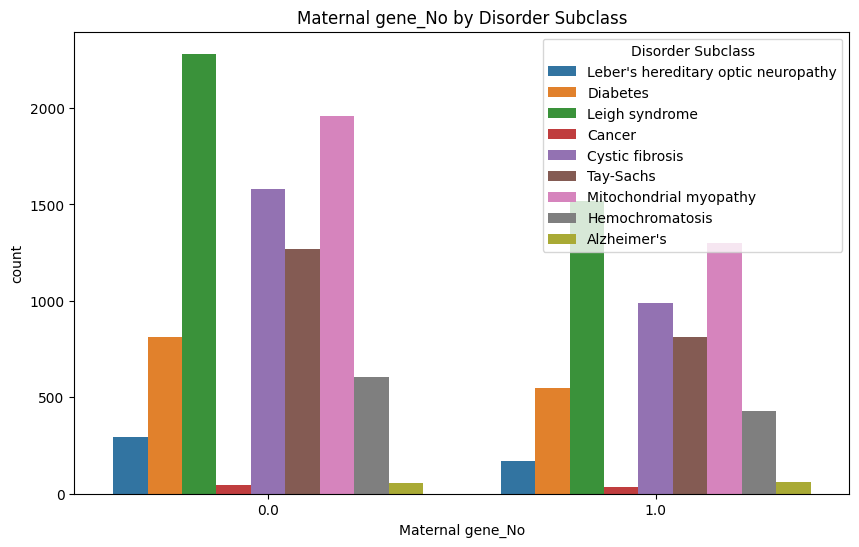

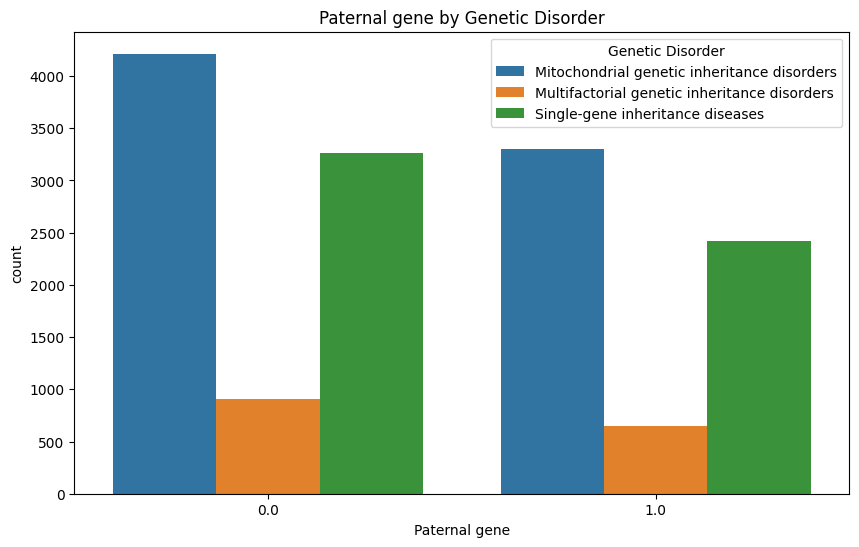

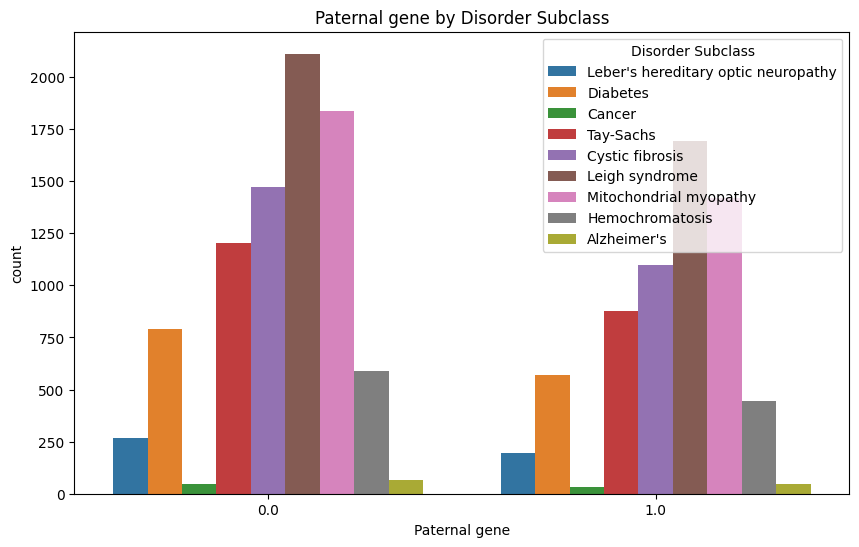

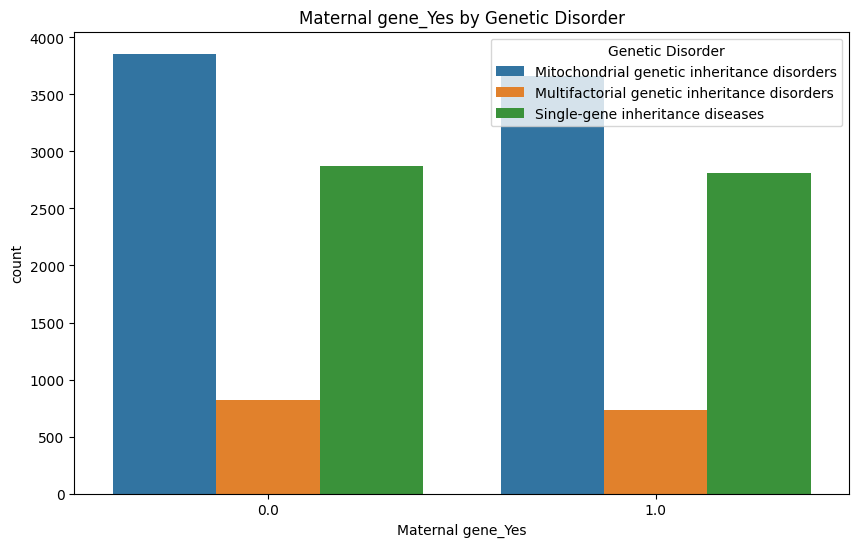

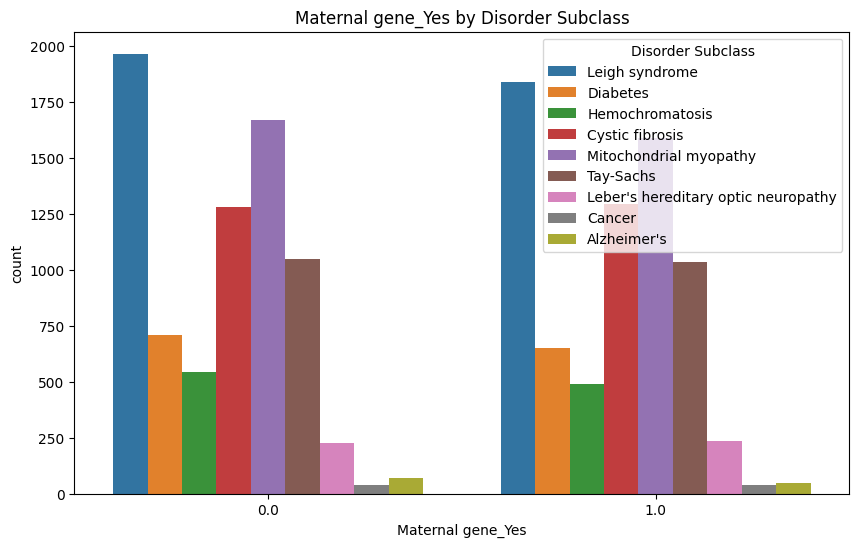

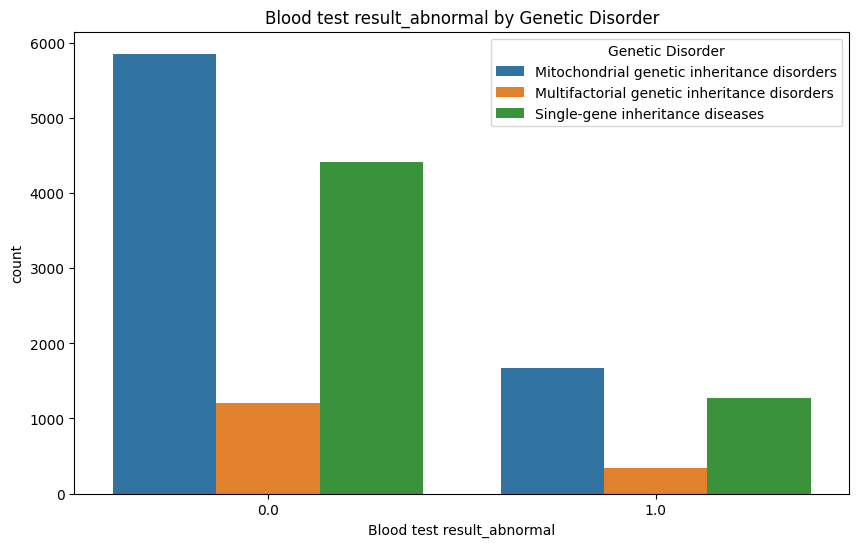

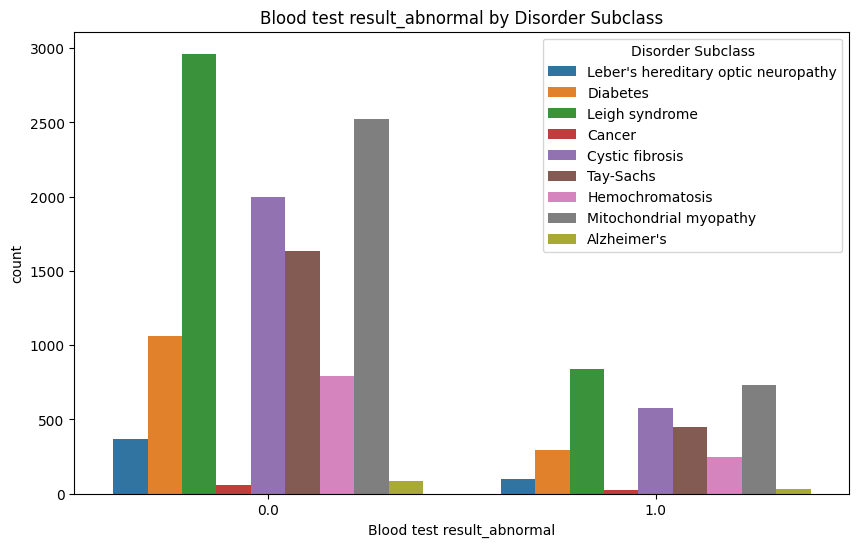

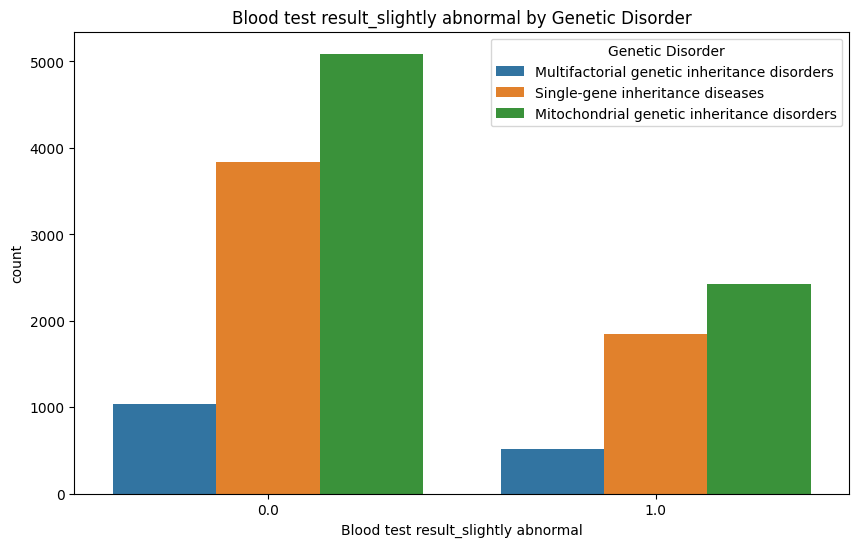

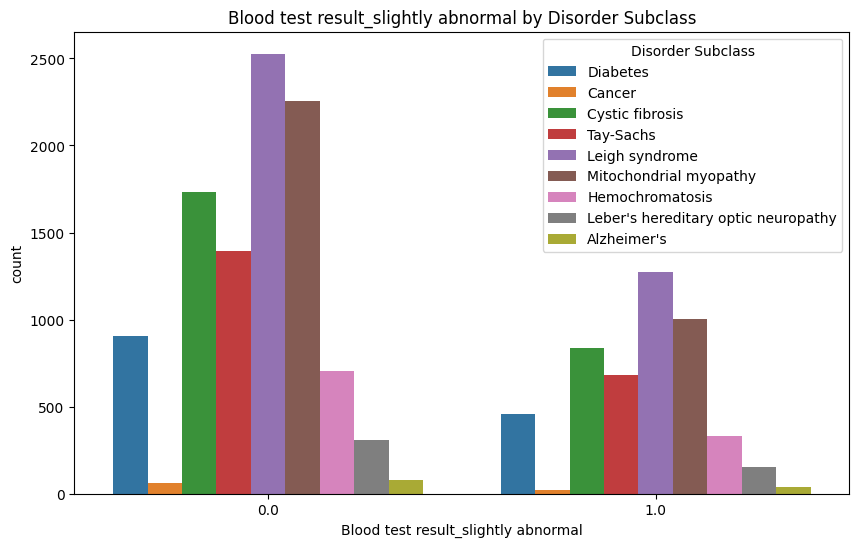

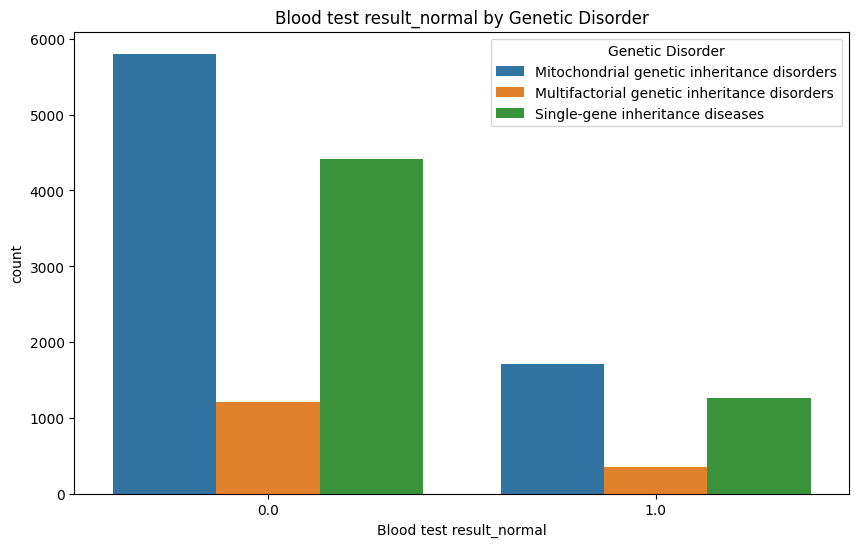

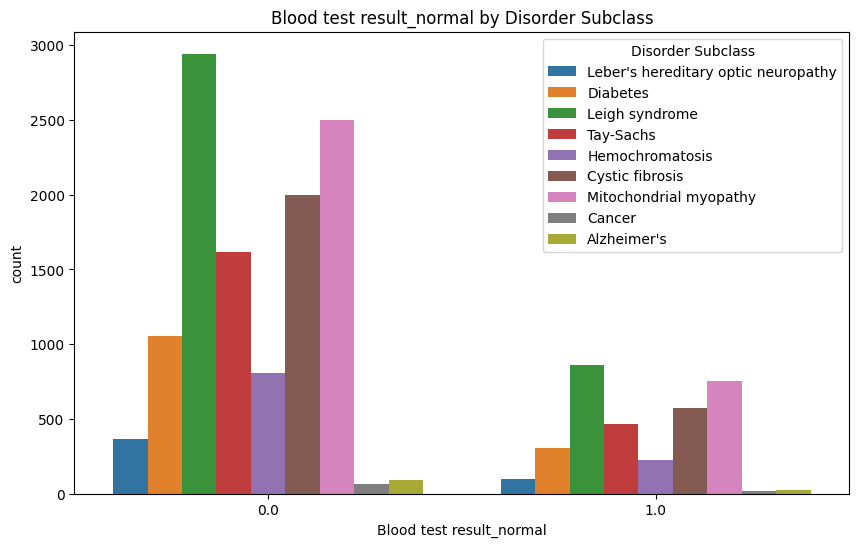

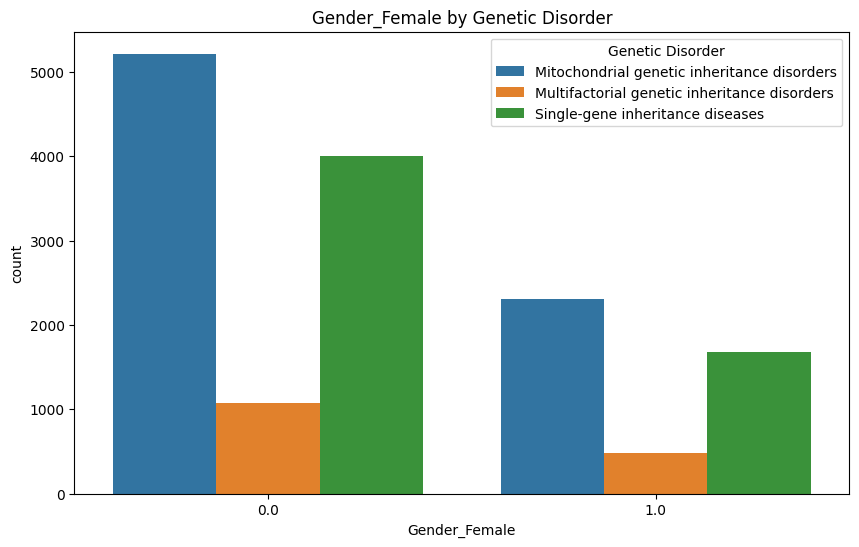

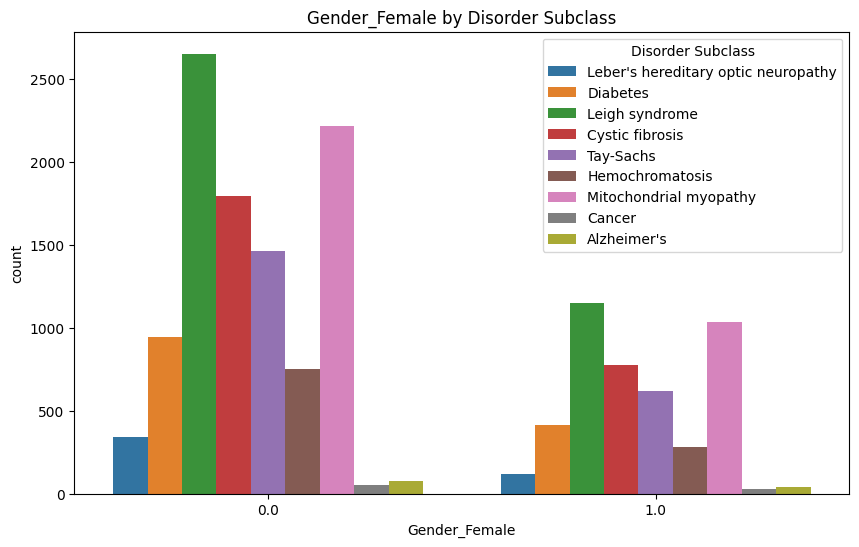

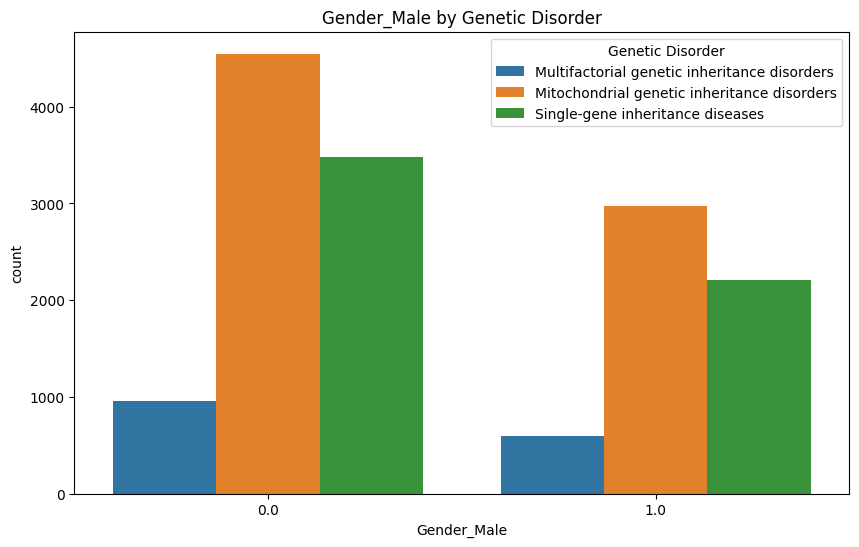

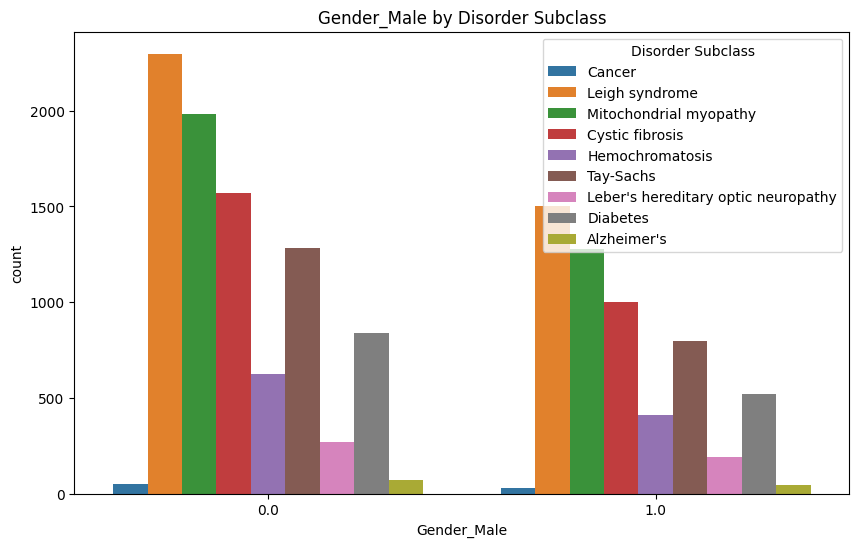

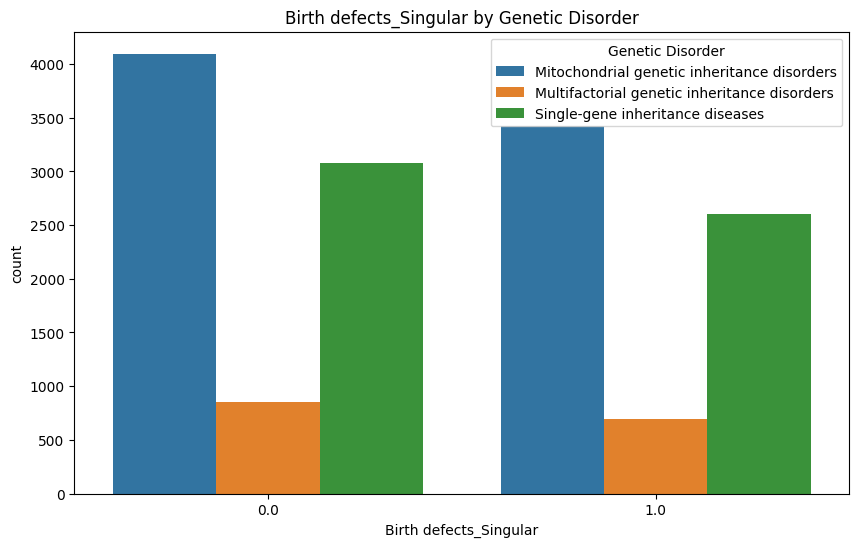

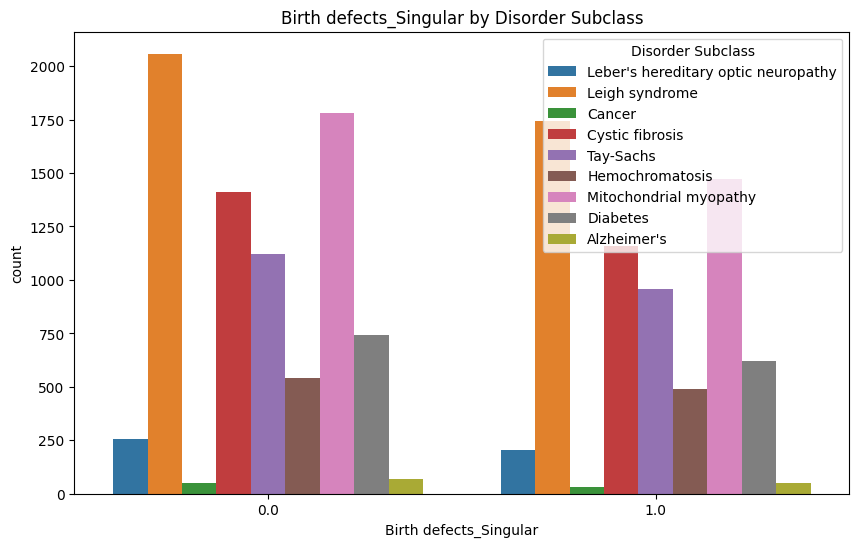

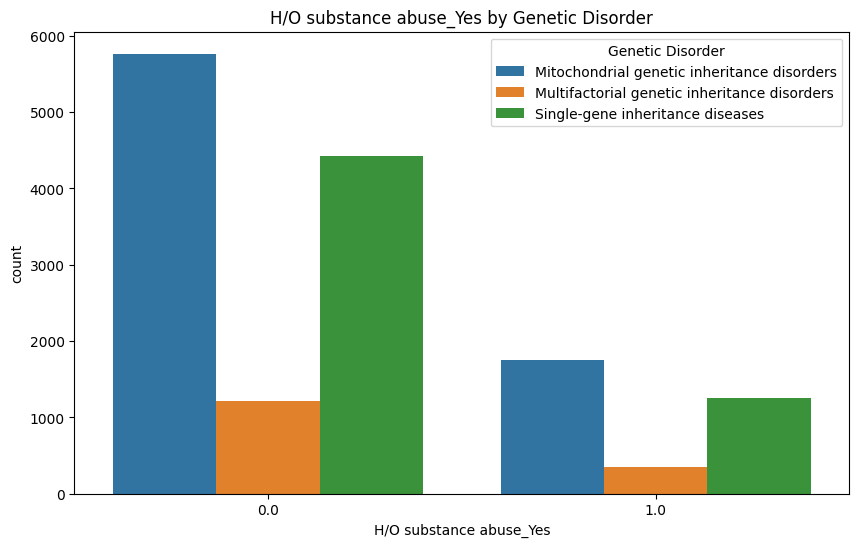

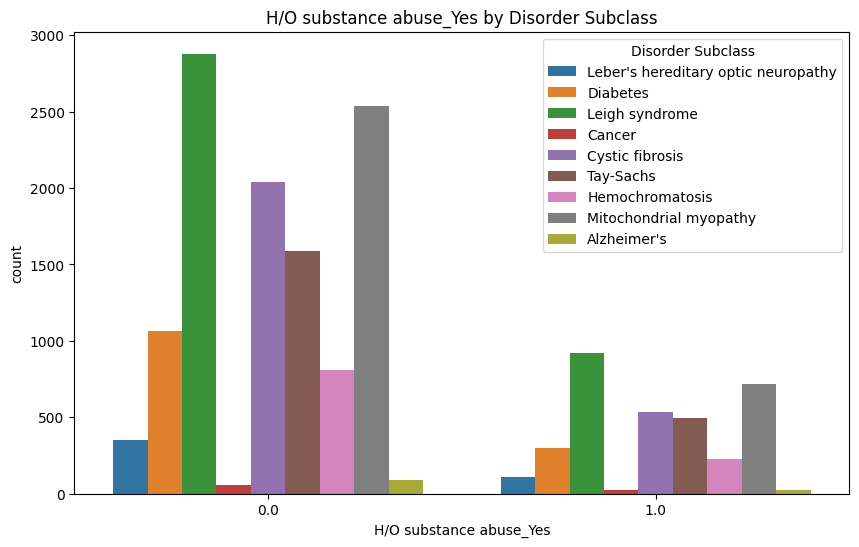

In [ ]:
target_variables = ['Genetic Disorder', 'Disorder Subclass']

for column in binary_features_chi:
    for target in target_variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=X_top_20[column], hue=df1[target])
        plt.title(f'{column} by {target}')
        plt.show()


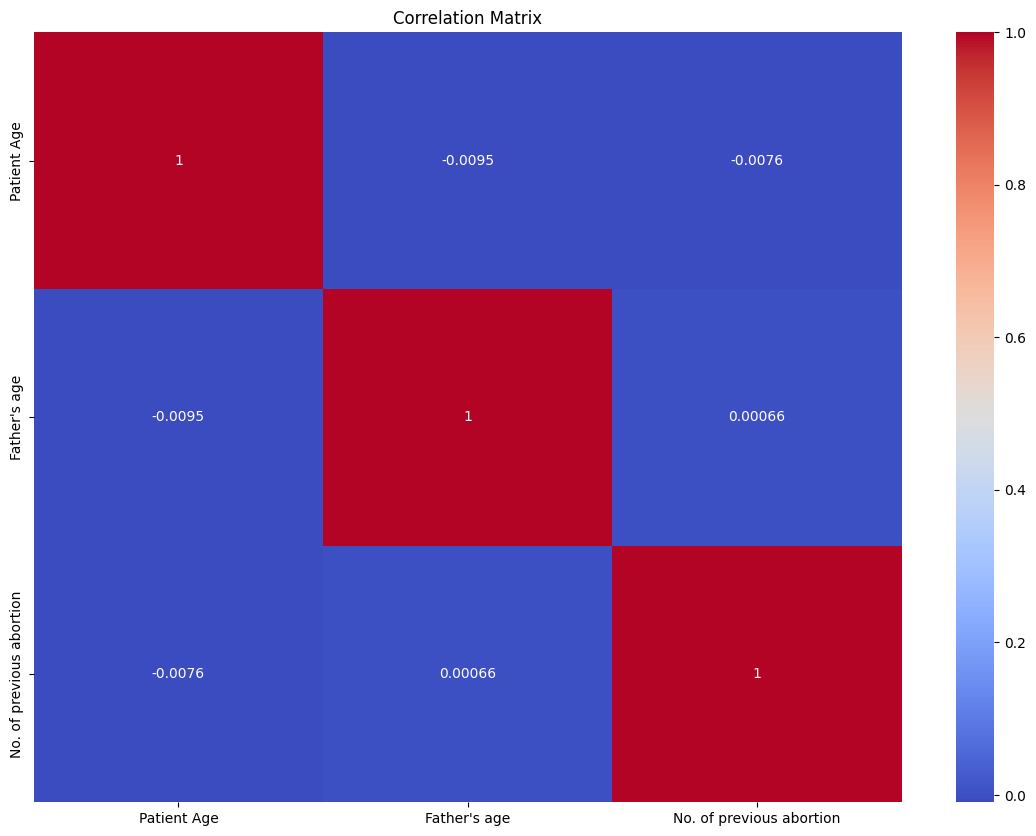

In [ ]:
#correlation matrix for continuous variables
plt.figure(figsize=(14, 10))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Extract features (X) and target variables (y1 and y2)
X = X_top_20
y1 = df1['Genetic Disorder']
y2 = df1['Disorder Subclass']


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


# Split the data into train and test sets for both target variables
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42, stratify= y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42, stratify= y2)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models for Genetic Disorder
models1, predictions1 = clf.fit(X_train1, X_test1, y_train1, y_test1)
print("Model performance for Genetic Disorder:")
print(models1)

# Fit and evaluate models for Disorder Subclass
models2, predictions2 = clf.fit(X_train2, X_test2, y_train2, y_test2)
print("Model performance for Disorder Subclass:")
print(models2)

 87%|████████▋ | 27/31 [01:16<00:26,  6.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 20
[LightGBM] [Info] Start training from score -0.669396
[LightGBM] [Info] Start training from score -2.262997
[LightGBM] [Info] Start training from score -0.957258


100%|██████████| 31/31 [01:17<00:00,  2.50s/it]


Model performance for Genetic Disorder:
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.45               0.56    None      0.46   
LGBMClassifier                     0.59               0.51    None      0.57   
QuadraticDiscriminantAnalysis      0.59               0.50    None      0.56   
SVC                                0.60               0.48    None      0.56   
RandomForestClassifier             0.58               0.48    None      0.57   
ExtraTreesClassifier               0.57               0.48    None      0.56   
BaggingClassifier                  0.55               0.47    None      0.54   
KNeighborsClassifier               0.53               0.45    None      0.52   
GaussianNB                         0.53               0.44    None      0.42   
ExtraTreeClassifier                0.49               0.43    None      0.49   


 87%|████████▋ | 27/31 [01:23<00:30,  7.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 20
[LightGBM] [Info] Start training from score -4.914111
[LightGBM] [Info] Start training from score -5.287090
[LightGBM] [Info] Start training from score -1.747124
[LightGBM] [Info] Start training from score -2.390649
[LightGBM] [Info] Start training from score -2.687958
[LightGBM] [Info] Start training from score -3.424817
[LightGBM] [Info] Start training from score -1.349106
[LightGBM] [Info] Start training from score -1.513857
[LightGBM] [Info] Start training from score -1.954397


100%|██████████| 31/31 [01:25<00:00,  2.77s/it]


Model performance for Disorder Subclass:
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 0.36               0.38    None      0.35   
QuadraticDiscriminantAnalysis      0.39               0.34    None      0.38   
NearestCentroid                    0.29               0.33    None      0.31   
GaussianNB                         0.38               0.31    None      0.36   
LogisticRegression                 0.42               0.29    None      0.41   
LGBMClassifier                     0.38               0.27    None      0.38   
LinearDiscriminantAnalysis         0.41               0.27    None      0.40   
BaggingClassifier                  0.34               0.26    None      0.34   
RandomForestClassifier             0.38               0.26    None      0.37   
ExtraTreesClassifier               0.36               0.26    None      0.35   

Test with the top 3 models

In [ ]:
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score


In [ ]:
# Train and Evaluate SVC Model for Genetic Disorder (y1)
svc = SVC()
svc.fit(X_train1, y_train1)
svc_predictions = svc.predict(X_test1)
svc_accuracy = accuracy_score(y_test1, svc_predictions)
svc_balanced_accuracy = balanced_accuracy_score(y_test1, svc_predictions)
svc_f1 = f1_score(y_test1, svc_predictions, average='weighted')

print(f"SVC (Genetic Disorder) - Accuracy: {svc_accuracy}, Balanced Accuracy: {svc_balanced_accuracy}, F1 Score: {svc_f1}")

SVC (Genetic Disorder) - Accuracy: 0.5121883656509695, Balanced Accuracy: 0.3333333333333333, F1 Score: 0.346963285615916


In [ ]:
# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train1, y_train1)
lgbm_predictions = lgbm.predict(X_test1)
lgbm_accuracy = accuracy_score(y_test1, lgbm_predictions)
lgbm_balanced_accuracy = balanced_accuracy_score(y_test1, lgbm_predictions)
lgbm_f1 = f1_score(y_test1, lgbm_predictions, average='weighted')

print(f"LGBMClassifier (Genetic Disorder) - Accuracy: {lgbm_accuracy}, Balanced Accuracy: {lgbm_balanced_accuracy}, F1 Score: {lgbm_f1}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 20
[LightGBM] [Info] Start training from score -0.669396
[LightGBM] [Info] Start training from score -2.262997
[LightGBM] [Info] Start training from score -0.957258


LGBMClassifier (Genetic Disorder) - Accuracy: 0.590027700831025, Balanced Accuracy: 0.5063847426335258, F1 Score: 0.572470802115568


In [ ]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train1, y_train1)
qda_predictions = qda.predict(X_test1)
qda_accuracy = accuracy_score(y_test1, qda_predictions)
qda_balanced_accuracy = balanced_accuracy_score(y_test1, qda_predictions)
qda_f1 = f1_score(y_test1, qda_predictions, average='weighted')

print(f"QuadraticDiscriminantAnalysis (Genetic Disorder) - Accuracy: {qda_accuracy}, Balanced Accuracy: {qda_balanced_accuracy}, F1 Score: {qda_f1}")


QuadraticDiscriminantAnalysis (Genetic Disorder) - Accuracy: 0.5919667590027701, Balanced Accuracy: 0.5046857001340506, F1 Score: 0.5607451003472144


In [ ]:
# Train and Evaluate Models for Disorder Subclass (y2)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train2, y_train2)
logreg_predictions = logreg.predict(X_test2)
logreg_accuracy = accuracy_score(y_test2, logreg_predictions)
logreg_balanced_accuracy = balanced_accuracy_score(y_test2, logreg_predictions)
logreg_f1 = f1_score(y_test2, logreg_predictions, average='weighted')

print(f"LogisticRegression (Disorder Subclass) - Accuracy: {logreg_accuracy}, Balanced Accuracy: {logreg_balanced_accuracy}, F1 Score: {logreg_f1}")
print("-----------------------------------------------")

# LightGBM
lgbm_subclass = LGBMClassifier()
lgbm_subclass.fit(X_train2, y_train2)
lgbm_subclass_predictions = lgbm_subclass.predict(X_test2)
lgbm_subclass_accuracy = accuracy_score(y_test2, lgbm_subclass_predictions)
lgbm_subclass_balanced_accuracy = balanced_accuracy_score(y_test2, lgbm_subclass_predictions)
lgbm_subclass_f1 = f1_score(y_test2, lgbm_subclass_predictions, average='weighted')

print(f"LGBMClassifier (Disorder Subclass) - Accuracy: {lgbm_subclass_accuracy}, Balanced Accuracy: {lgbm_subclass_balanced_accuracy}, F1 Score: {lgbm_subclass_f1}")
print("-----------------------------------------------")

# Quadratic Discriminant Analysis
qda_subclass = QuadraticDiscriminantAnalysis()
qda_subclass.fit(X_train2, y_train2)
qda_subclass_predictions = qda_subclass.predict(X_test2)
qda_subclass_accuracy = accuracy_score(y_test2, qda_subclass_predictions)
qda_subclass_balanced_accuracy = balanced_accuracy_score(y_test2, qda_subclass_predictions)
qda_subclass_f1 = f1_score(y_test2, qda_subclass_predictions, average='weighted')

print(f"QuadraticDiscriminantAnalysis (Disorder Subclass) - Accuracy: {qda_subclass_accuracy}, Balanced Accuracy: {qda_subclass_balanced_accuracy}, F1 Score: {qda_subclass_f1}")

LogisticRegression (Disorder Subclass) - Accuracy: 0.4113573407202216, Balanced Accuracy: 0.2557458852961581, F1 Score: 0.393070526060434
-----------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 20
[LightGBM] [Info] Start training from score -4.914111
[LightGBM] [Info] Start training from score -5.287090
[LightGBM] [Info] Start training from score -1.747124
[LightGBM] [Info] Start training from score -2.390649
[LightGBM] [Info] Start training from score -2.687958
[LightGBM] [Info] Start training from score -3.424817
[LightGBM] [Info] Start training from score -1.349106
[Lig

In [ ]:
from sklearn.model_selection import GridSearchCV

# SVC
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# LightGBM
lgbm_param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Quadratic Discriminant Analysis
qda_param_grid = {
    'reg_param': [0.0, 0.1, 0.5, 1.0]
}

# Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}






For genetic Disorder Hyperparameter Tuning

In [ ]:
## taking so much time to run 

# For Genetic Disorder
# svc = SVC()
# svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
# svc_grid_search.fit(X_train1, y_train1)

# # Print the best parameters and scores
# print("Best parameters for SVC:", svc_grid_search.best_params_)
# print("Best score for SVC:", svc_grid_search.best_score_)

LGBM for Train data

In [ ]:
lgbm = LGBMClassifier()
lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='accuracy')
lgbm_grid_search.fit(X_train1, y_train1)

print("Best parameters for LGBMClassifier:", lgbm_grid_search.best_params_)
print("Best score for LGBMClassifier:", lgbm_grid_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 11549, number of used features: 20
[LightGBM] [Info] Start training from score -0.669446
[LightGBM] [Info] Start training from score -2.263444
[LightGBM] [Info] Start training from score -0.957071


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 11549, number of used features: 20
[LightGBM] [Info] Start training from score -0.669446
[LightGBM] [Info] Start training from score -2.263444
[LightGBM] [Info] Start training from score -0.957071
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 11550, nu

##### For lgbm the accuracy for train dataset
 - Best parameters for LGBMClassifier: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}
 - Best score for LGBMClassifier: 0.592435931633543
 

In [ ]:
# for test dataset lgbm
lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='accuracy')
lgbm_grid_search.fit(X_test1, y_test1)

print("Best parameters for LGBMClassifier:", lgbm_grid_search.best_params_)
print("Best score for LGBMClassifier:", lgbm_grid_search.best_score_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 2888, number of used features: 20
[LightGBM] [Info] Start training from score -0.669198
[LightGBM] [Info] Start training from score -2.264537
[LightGBM] [Info] Start training from score -0.957106


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 2888, number of used features: 20
[LightGBM] [Info] Start training from score -0.669198
[LightGBM] [Info] Start training from score -2.264537
[LightGBM] [Info] Start training from score -0.957106
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 2888, numb

## using the best paramaters for hyperparamter tuning that we got.


In [ ]:
# Best parameters for LGBMClassifier: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}
# Best score for LGBMClassifier: 0.592435931633543 on USING GridSearch cv
    
# Best parameters found from GridSearchCV
lgbm_best_params = {
    'num_leaves': 31,
    'learning_rate': 0.01,
    'n_estimators': 500
}

# Train the final model on the entire training set with the best parameters
final_lgbm = LGBMClassifier(**lgbm_best_params)
final_lgbm.fit(X_train1, y_train1)
train_accuracy = final_lgbm.score(X_train1, y_train1)
print("Train accuracy for LGBMClassifier with best parameters:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = final_lgbm.score(X_test1, y_test1)
print("Test accuracy for LGBMClassifier with best parameters:", test_accuracy)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 20
[LightGBM] [Info] Start training from score -0.669396
[LightGBM] [Info] Start training from score -2.262997
[LightGBM] [Info] Start training from score -0.957258


Train accuracy for LGBMClassifier with best parameters: 0.6635034979566392
Test accuracy for LGBMClassifier with best parameters: 0.602770083102493


#### Using LGBM classifier we got 66% on training data and 60% on testing data

#### Test with Quadratic Discriminant Analysis for y1(gentic Disorder)

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda_grid_search = GridSearchCV(qda, qda_param_grid, cv=5, scoring='accuracy')
qda_grid_search.fit(X_train1, y_train1)

print("Best parameters for QuadraticDiscriminantAnalysis:", qda_grid_search.best_params_)
print("Best score for QuadraticDiscriminantAnalysis:", qda_grid_search.best_score_)

Best parameters for QuadraticDiscriminantAnalysis: {'reg_param': 0.0}
Best score for QuadraticDiscriminantAnalysis: 0.5861330090855272


In [ ]:
#best paramater for QDA is reg_param:0
# test te accuracy
# Quadratic Discriminant Analysis

qda_best_param_grid = {
    'reg_param':0.0
}

# Train the final model on the entire training set with the best parameters
final_qda = QuadraticDiscriminantAnalysis(**qda_best_param_grid)
final_qda.fit(X_train1, y_train1)
train_accuracy = final_qda.score(X_train1, y_train1)
print("Train accuracy for QDA with best parameters:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = final_qda.score(X_test1, y_test1)
print("Test accuracy for QDA with best parameters:", test_accuracy)


Train accuracy for QDA with best parameters: 0.6060123294313223
Test accuracy for QDA with best parameters: 0.5919667590027701


#### QDA got the all most equal accuracy of 60.6% on train dataset and 59.1% on test dataset

### Now with disorder subclass

In [ ]:
#check with logistic regression

logreg = LogisticRegression()
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train2, y_train2)

print("Best parameters for LogisticRegression:", logreg_grid_search.best_params_)
print("Best score for LogisticRegression:", logreg_grid_search.best_score_)

Best parameters for LogisticRegression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.396828029364608


In [ ]:
# Now try with best paramaters for logistic regression

logreg_best_param_grid = {
    'C': 100, 
    'penalty': 'l2', 
    'solver': 'liblinear'
}

# Train the final model on the entire training set with the best parameters
final_logreg = LogisticRegression(**logreg_best_param_grid)
final_logreg.fit(X_train2, y_train2)
train_accuracy = final_logreg.score(X_train2, y_train2)
print("Train accuracy for Logistic Regression with best parameters:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = final_logreg.score(X_test2, y_test2)
print("Test accuracy for Logistic Regression with best parameters:", test_accuracy)

Train accuracy for Logistic Regression with best parameters: 0.4029923114220406
Test accuracy for Logistic Regression with best parameters: 0.3864265927977839


#### Logistic Regression got the  accuracy of 40.2% on train dataset and 38.6% on test dataset

Trying with QDA

In [ ]:
qda_grid_search_subclass = GridSearchCV(qda, qda_param_grid, cv=5, scoring='accuracy')
qda_grid_search_subclass.fit(X_train2, y_train2)

print("Best parameters for QDA (Disorder Subclass):", qda_grid_search_subclass.best_params_)
print("Best score for QDA (Disorder Subclass):", qda_grid_search_subclass.best_score_)

Best parameters for QDA (Disorder Subclass): {'reg_param': 0.1}
Best score for QDA (Disorder Subclass): 0.39662034509459254


In [ ]:
qda_best_param_grid = {
    'reg_param':0.1
}

# Train the final model on the entire training set with the best parameters
final_qda = QuadraticDiscriminantAnalysis(**qda_best_param_grid)
final_qda.fit(X_train2, y_train2)
train_accuracy = final_qda.score(X_train2, y_train2)
print("Train accuracy for QDA(Disorder Subclass) :", train_accuracy)

# Evaluate the model on the test set
test_accuracy = final_qda.score(X_test2, y_test2)
print("Test accuracy for QDA(Disorder Subclass):", test_accuracy)


Train accuracy for QDA(Disorder Subclass) : 0.440396204197548
Test accuracy for QDA(Disorder Subclass): 0.3889196675900277


#### QDA got the  accuracy of 44.0% on train dataset and 38.8% on test dataset

Trying with LGBM

In [ ]:
# Taking so much time I have tried few times and stopped the execution of this cell 

# lgbm_grid_search_subclass = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='accuracy')
# lgbm_grid_search_subclass.fit(X_train2, y_train2)

# print("Best parameters for LGBM (Disorder Subclass):", lgbm_grid_search_subclass.best_params_)
# print("Best score for LGBM (Disorder Subclass):", lgbm_grid_search_subclass.best_score_)

Trying with linear Discriment Model for Disorder Subclass

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train2, y_train2)
lda_predictions = lda.predict(X_test2)
lda_accuracy = accuracy_score(y_test2, lda_predictions)
lda_balanced_accuracy = balanced_accuracy_score(y_test2, lda_predictions)
lda_f1 = f1_score(y_test2, lda_predictions, average='weighted')

print(f"LDA (Disorder Subclass) - Accuracy: {lda_accuracy}, Balanced Accuracy: {lda_balanced_accuracy}, F1 Score: {lda_f1}")


LDA (Disorder Subclass) - Accuracy: 0.4113573407202216, Balanced Accuracy: 0.2720282167022089, F1 Score: 0.3966537020892883


LDA Hyperparamater Tuning

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train2, y_train2)

# Get the best model
best_lda = grid_search.best_estimator_

# Evaluate the best model
best_lda_predictions = best_lda.predict(X_test2)
best_lda_accuracy = accuracy_score(y_test2, best_lda_predictions)
best_lda_balanced_accuracy = balanced_accuracy_score(y_test2, best_lda_predictions)
best_lda_f1 = f1_score(y_test2, best_lda_predictions, average='weighted')

print(f"Best LDA (Disorder Subclass) - Accuracy: {best_lda_accuracy}, Balanced Accuracy: {best_lda_balanced_accuracy}, F1 Score: {best_lda_f1}")
print(f"Best Parameters: {grid_search.best_params_}")


Best LDA (Disorder Subclass) - Accuracy: 0.4119113573407202, Balanced Accuracy: 0.27331356743368246, F1 Score: 0.39745433182025375
Best Parameters: {'solver': 'lsqr'}


In [ ]:
lda_best_param_grid = {
    'solver': 'lsqr'
}

# Train the final model on the entire training set with the best parameters
final_lda = LinearDiscriminantAnalysis(**lda_best_param_grid)
final_lda.fit(X_train2, y_train2)
train_accuracy = final_lda.score(X_train2, y_train2)
print("Train accuracy for LDA(Disorder Subclass) :", train_accuracy)

# Evaluate the model on the test set
test_accuracy = final_lda.score(X_test2, y_test2)
print("Test accuracy for LDA(Disorder Subclass):", test_accuracy)


Train accuracy for LDA(Disorder Subclass) : 0.4295906351735125


Test accuracy for LDA(Disorder Subclass): 0.4119113573407202


In [ ]:
# for Genetic Disorder
genetic_disorder_results = {
    'Model': ['LGBMClassifier', 'QuadraticDiscriminantAnalysis'],
    'Target Variable': ['Genetic Disorder', 'Genetic Disorder'],
    'Train Accuracy': ['66%', '60%'],
    'Test Accuracy': ['60%', '59%']
}

# for Disorder Subclass
disorder_subclass_results = {
    'Model': ['QuadraticDiscriminantAnalysis','LinearDiscriminantAnalysis', 'LogisticRegression'],
    'Target Variable': ['Disorder Subclass', 'Disorder Subclass', 'Disorder Subclass'],
    'Train Accuracy': ['44%', '42%', '40%'],
    'Test Accuracy': ['38%', '41%', '39%']
}

# Create DataFrames
genetic_disorder_df = pd.DataFrame(genetic_disorder_results)
disorder_subclass_df = pd.DataFrame(disorder_subclass_results)

# Combine DataFrames
combined_results_df = pd.concat([genetic_disorder_df, disorder_subclass_df], ignore_index=True)

# Save to CSV
combined_results_df.to_csv('model_results.csv', index=False)


print("Results have been saved to 'model_results.csv'")


Results have been saved to 'model_results.csv'


Summary

# Final Model Selection

## Genetic Disorder
**Selected Model:** LGBMClassifier  
**Training Accuracy:** 66%  
**Testing Accuracy:** 60%

## Disorder Subclass
**Selected Model:** Quadratic Discriminant Analysis (QDA)  
**Training Accuracy:** 44%  
**Testing Accuracy:** 38.8%

## Conclusion
The LGBMClassifier and QDA models were chosen based on their performance on training and testing datasets. These models will be used for deployment.
